<a href="https://colab.research.google.com/github/Vibranovski/MVP1_PUC-RIO/blob/main/Daniel_Vibranovski_Costa_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Daniel Vibranovski Costa

**Matrícula:** RA: 4052025001301 - Série: 1 Período: 1A Turma: 40530010002_20250_01

**Dataset:** [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

# Descrição do Problema

O dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) é um conjunto de dados que oferece uma análise abrangente do mercado de trabalho em inteligência artificial, com mais de 15.000 vagas reais coletadas nas principais plataformas de emprego do mundo. Ele inclui informações detalhadas sobre salários, requisitos das vagas, insights sobre as empresas e tendências geográficas.

O objetivo principal é prever os salários de empregos na área de inteligência artificial, analisando os fatores que influenciam a remuneração e permitindo comparações.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

1. A localização geográfica da companhia seria um fator que influencia no salário do profissional de IA?
2. Existe diferença no salário entre profissionais de IA que trabalham de maneira remota, híbrida ou presencial?
3. Há similaridades de skills entre os profissionais de IA mais bem remunerados?
4. Existe alguma correlação entre o tamanho da empresa e o salário do profissional de IA?
5. Os profissionais de diferentes ramificações da IA tem remunerações diferentes?
6. O setor da empresa altera o salário do profissional de IA?
7. O nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência influenciam o salário?

## Tipo de Problema

Este é um problema de **regressão supervisionada**. A partir de um conjunto de dados do mercado de trabalho em inteligência artificial, o objetivo é prever qual será o salário do profissional com base em suas características.

## Seleção de Dados

O dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) é um conjunto de dados já pronto para uso disponível no site Kaggle.

## Atributos do dataset

- Possui 15.000 vagas de emprego em mais de 50 países
- Dados salariais em várias moedas (normalizados para USD)
- Classificação por nível de experiência (Júnior/Iniciante, Pleno/Intermediário, Sênior, Executivo/Diretor)
- Análise do impacto do tamanho da empresa
- Tendências e padrões de trabalho remoto
- Análise da demanda por habilidades
- Variações salariais por região geográfica
- Dados em série temporal mostrando a evolução do mercado

## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

In [1]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install kagglehub
%pip install seaborn
%pip install tabulate
%pip install squarify

In [2]:
# Bibliotecas de manipulação e ciência de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Estatística
import scipy.stats as stats

# Pré-processamento e modelos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Kaggle
import kagglehub

### Carregamento do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

In [3]:
# Faz o download do dataset "Global AI Job Market and Salary Trends 2025" do Kaggle usando o kagglehub
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

In [4]:
# Imprime o caminho local onde o dataset foi salvo após o download
print(path)

/kaggle/input/global-ai-job-market-and-salary-trends-2025


In [5]:
# guardo o dataset em um dataframe
# leitura do arquivo CSV
df = pd.read_csv(path + "/ai_job_dataset.csv")

In [6]:
# Exibir as primeiras 5 linhas
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [7]:
# Exibir as últimas 5 linhas
df.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations


In [8]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [9]:
# Exibe os nomes das colunas do DataFrame df
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o mercado de trabalho em inteligência artificial, busco entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) possui 15000 instâncias (observações) e 19 colunas.

In [10]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 15000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-nu

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [11]:
# Estatísticas descritivas básicas do dataset
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [12]:
# Média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
salary_usd,115348.965133
remote_ratio,49.483333
years_experience,6.253200
job_description_length,1503.314733
benefits_score,7.504273


## Gráfico em barras

O gráfico de barras é uma representação visual que compara valores de diferentes categorias por meio da altura (ou comprimento) das barras. Ideal para variáveis categóricas, ele facilita a visualização de quantidades, frequências ou proporções, permitindo identificar rapidamente quais grupos se destacam ou possuem menor representatividade.

#### Gráficos **Quantidade de registros por país** e **Salário Médio por País**

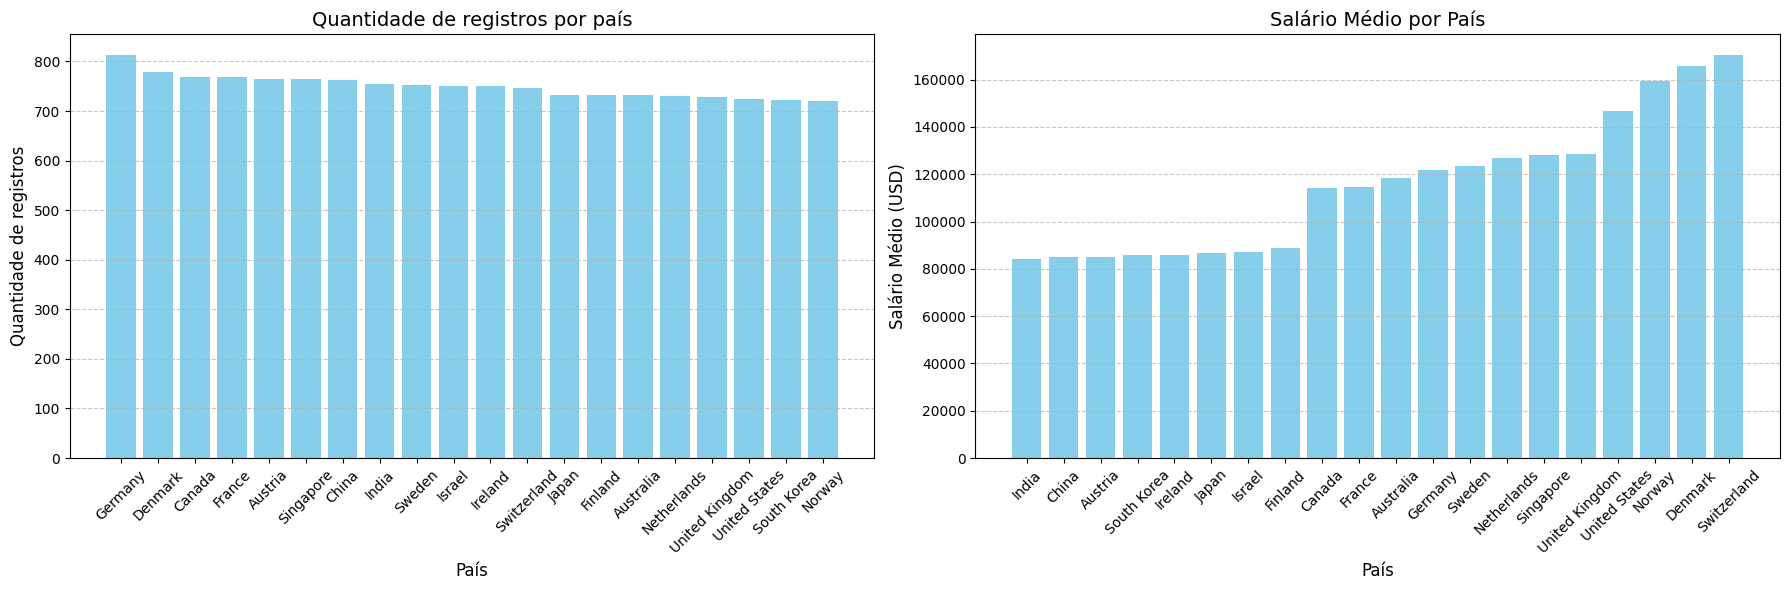

In [13]:
# --- Gráfico 1: Quantidade de registros por país ---
dados_por_pais = df['company_location'].value_counts().sort_values(ascending=False)

# --- Gráfico 2: Salário médio por país ---
salario_medio_por_pais = df.groupby('company_location')['salary_usd'].mean().sort_values()

# Criando subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1
axs[0].bar(dados_por_pais.index, dados_por_pais.values, color='skyblue')
axs[0].set_title('Quantidade de registros por país', fontsize=14)
axs[0].set_xlabel('País', fontsize=12)
axs[0].set_ylabel('Quantidade de registros', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2
axs[1].bar(salario_medio_por_pais.index, salario_medio_por_pais.values, color='skyblue')
axs[1].set_title('Salário Médio por País', fontsize=14)
axs[1].set_xlabel('País', fontsize=12)
axs[1].set_ylabel('Salário Médio (USD)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Conclusão dos gráficos **Quantidade de registros por país** e **Salário Médio por País**

O gráfico de barras **Quantidade de registros por país**, construído a partir da coluna **`company_location` (localização da empresa)**, mostra que a distribuição da quantidade de dados entre os **20 países** é relativamente **equilibrada**, sem grandes variações ou disparidades significativas. Essa uniformidade é adequada para uma **análise acadêmica confiável**, evitando viés de confirmação e garantindo uma base sólida para comparações entre países.

Por outro lado, o gráfico de barras **Salário Médio por País**, gerado a partir da média da coluna **`salary_usd` (salário em dólares)**  agrupada pela **`company_location` (localização da empresa)**, revela que existem **diferenças salariais relevantes** entre os países. A **Suíça** apresenta a **maior média salarial**, enquanto a **Índia** possui a menor. Esses dados **confirmam a Hipótese 1 do MVP**, de que a **localização geográfica da empresa influencia diretamente na remuneração** dos profissionais da área de Inteligência Artificial.

#### Gráficos **Quantidade de dados por modalidade de trabalho** e **Salário Médio por Modelo de Trabalho (presencial, híbrido ou remoto)**

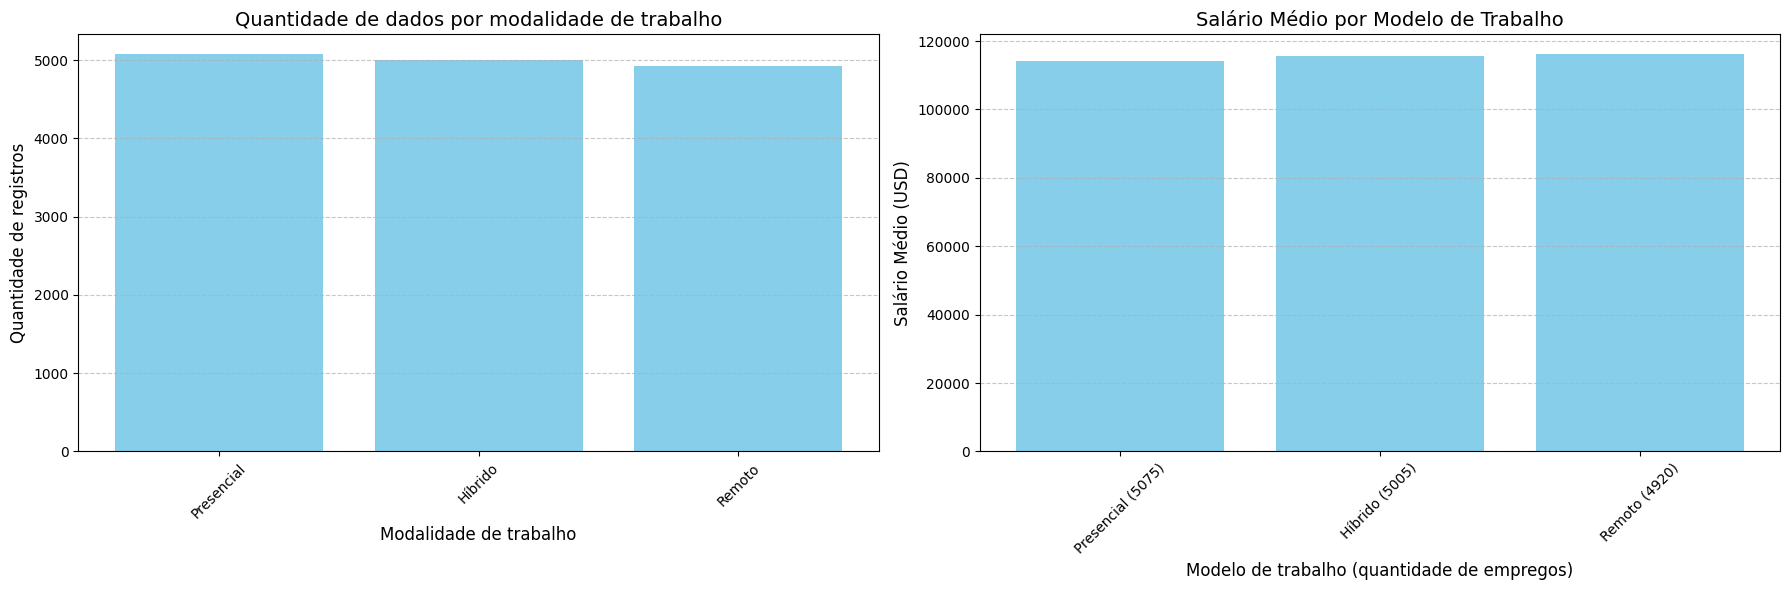

In [14]:
# --- Dados para o Gráfico 1: Quantidade por modalidade de trabalho ---
dados_por_modelo_de_trabalho = df['remote_ratio'].value_counts().sort_values(ascending=False)

rotulos = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}

rotulos_barras_1 = [rotulos[key] for key in dados_por_modelo_de_trabalho.index]

# --- Dados para o Gráfico 2: Salário médio por modelo de trabalho ---
salario_medio_trabalho_remoto = df.groupby('remote_ratio')['salary_usd'].mean().sort_index()
quantidade_trabalho_remoto = df['remote_ratio'].value_counts().sort_index()

rotulos_barras_2 = [
    f"{rotulos[key]} ({quantidade_trabalho_remoto[key]})"
    for key in sorted(rotulos.keys())
]

# Criando subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Quantidade por modalidade
axs[0].bar(rotulos_barras_1, dados_por_modelo_de_trabalho.values, color='skyblue')
axs[0].set_title('Quantidade de dados por modalidade de trabalho', fontsize=14)
axs[0].set_xlabel('Modalidade de trabalho', fontsize=12)
axs[0].set_ylabel('Quantidade de registros', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Salário médio por modalidade
axs[1].bar(rotulos_barras_2, salario_medio_trabalho_remoto.values, color='skyblue')
axs[1].set_title('Salário Médio por Modelo de Trabalho', fontsize=14)
axs[1].set_xlabel('Modelo de trabalho (quantidade de empregos)', fontsize=12)
axs[1].set_ylabel('Salário Médio (USD)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Conclusão dos gráficos **Quantidade de dados por modalidade de trabalho** e **Salário Médio por modelo de trabalho (presencial, híbrido ou remoto)**

O gráfico de barras **Quantidade de dados por modalidade de trabalho**, construído com base na coluna **`remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto)**, mostra que há uma **distribuição equilibrada** de registros entre os três modelos de trabalho — **presencial**, **híbrido** e **remoto**. Essa uniformidade é adequada para uma **análise acadêmica confiável**, sem viés de confirmação, garantindo comparações justas entre os diferentes regimes de atuação.

Já o gráfico **Salário Médio por modelo de trabalho**, obtido a partir da média da coluna **`salary_usd` (salário em dólares)** agrupada por **`remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto)**, revela que **não há diferenças significativas entre as médias salariais**, mesmo após normalização para dólares americanos. A **variação observada é mínima**, o que **contraria a Hipótese 2 do MVP**, que propunha a existência de **disparidades salariais relevantes entre os regimes remoto, híbrido e presencial**.

#### Gráficos **Quantidade por nível de experiência** e **Distribuição por anos de experiência** e Tabela de **Anos de experiência por nível**

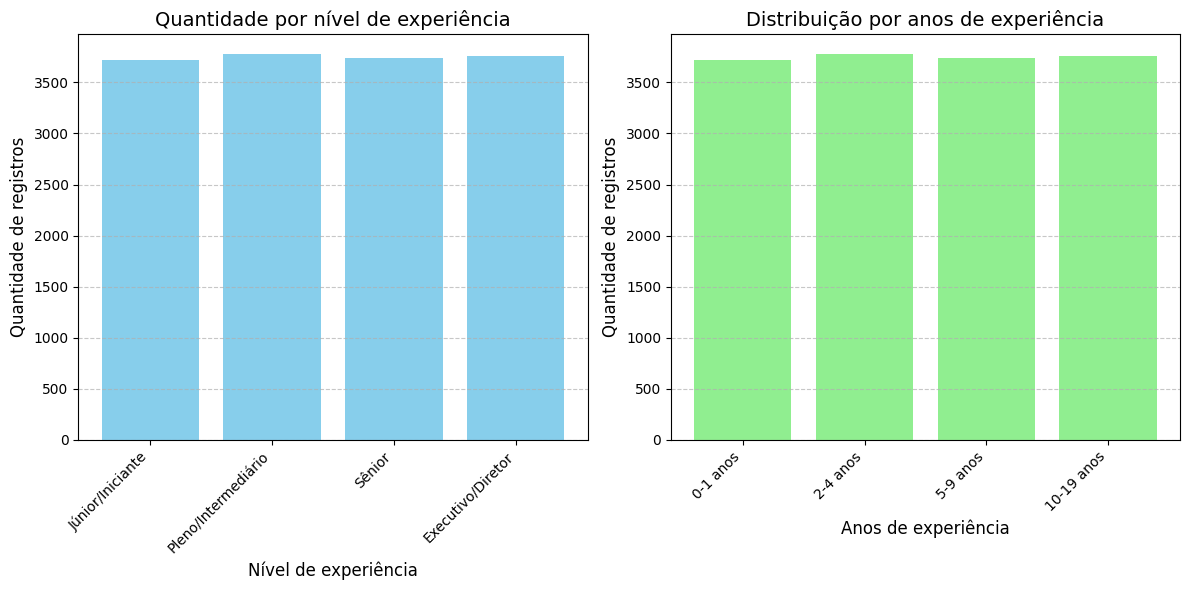

Anos de experiência por nível:
                     Mínimo  Máximo
experience_level                   
Júnior/Iniciante          0       1
Pleno/Intermediário       2       4
Sênior                    5       9
Executivo/Diretor        10      19


In [15]:
# Gráficos Quantidade por nível de experiência e Distribuição por anos de experiência:
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Ordem desejada
ordem_experiencia = ['EN', 'MI', 'SE', 'EX']

# Contando os valores e reordenando conforme a ordem desejada
dados_por_experiencia = df['experience_level'].value_counts()
dados_ordenados = [dados_por_experiencia.get(nivel, 0) for nivel in ordem_experiencia]
rotulos_barras = [rotulos_experiencia[nivel] for nivel in ordem_experiencia]

# Distribuição de years_experience
anos_experiencia = df['years_experience'].value_counts().sort_index()

# Agrupando os anos de experiência em intervalos
anos_experiencia = [sum(anos_experiencia[0:2]), sum(anos_experiencia[2:5]), sum(anos_experiencia[5:10]), sum(anos_experiencia[10:])]

# Criando os dois gráficos lado a lado
plt.figure(figsize=(12, 6))

# Gráfico 1: Por nível de experiência
plt.subplot(1, 2, 1)
plt.bar(rotulos_barras, dados_ordenados, color='skyblue')
plt.title('Quantidade por nível de experiência', fontsize=14)
plt.xlabel('Nível de experiência', fontsize=12)
plt.ylabel('Quantidade de registros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Por anos de experiência
plt.subplot(1, 2, 2)
plt.bar(["0-1 anos", "2-4 anos", "5-9 anos","10-19 anos"], anos_experiencia, color='lightgreen')
plt.title('Distribuição por anos de experiência', fontsize=14)
plt.xlabel('Anos de experiência', fontsize=12)
plt.ylabel('Quantidade de registros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Anos de experiência por nível:
# Mapeamento dos rótulos legíveis
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Criando um DataFrame com as estatísticas por nível de experiência
estatisticas_experiencia = df.groupby('experience_level')['years_experience'].agg(['min', 'max'])

# Renomeando os índices para os nomes legíveis
estatisticas_experiencia.index = estatisticas_experiencia.index.map(rotulos_experiencia)

# Renomeando as colunas para português
estatisticas_experiencia = estatisticas_experiencia.rename(columns={
    'min': 'Mínimo',
    'max': 'Máximo',
})

# Ordenando conforme a ordem Júnior -> Pleno -> Sênior -> Executivo
ordem_desejada = ['Júnior/Iniciante', 'Pleno/Intermediário', 'Sênior', 'Executivo/Diretor']
estatisticas_experiencia = estatisticas_experiencia.loc[ordem_desejada]

# Mostrando o resultado
print("Anos de experiência por nível:")
print(estatisticas_experiencia)

#### Conclusão dos gráficos **Quantidade por nível de experiência** e **Distribuição por anos de experiência** e da tabela de **Anos de experiência por nível**

O gráfico **Quantidade por nível de experiência**, baseado na coluna **`experience_level` (nível de experiência)**, demonstra uma distribuição equilibrada e homogênea entre as categorias:
- Júnior
- Pleno
- Sênior
- Executivo

Já o gráfico **Distribuição por Anos de Experiência**, construído com base na coluna **`years_experience` (anos de experiência)**, confirma essa distribuição balanceada, considerando as seguintes faixas (as faixas puderam ser esclarecidas a partir da tabela apresentada como resultado ao código acima):

| Categoria              | Anos Mínimos | Anos Máximos |
|------------------------|-------------:|-------------:|
| Júnior/Iniciante       | 0            | 1            |
| Pleno/Intermediário    | 2            | 4            |
| Sênior                 | 5            | 9            |
| Executivo/Diretor      | 10           | 19           |



**Assim, ambos os gráficos apresentam uma distribuição proporcional entre as diferentes categorias de experiência profissional, própria para uma análise acadêmica e sem nenhum viés de confirmação, de modo a servir como base para os próximos gráficos deste MVP.**

## Gráfico Pair Plot/Scatterplot Matrix

O gráfico Pair Plot (ou matriz de dispersão) é uma representação visual usada para explorar relações entre múltiplas variáveis numéricas simultaneamente. Ele combina gráficos de dispersão para cada par de variáveis e distribuições univariadas na diagonal, facilitando a identificação de padrões, correlações, agrupamentos e outliers, especialmente quando segmentado por categorias.

#### Gráfico Pair Plot **Análise Salarial por Anos e Nível de Experiência**

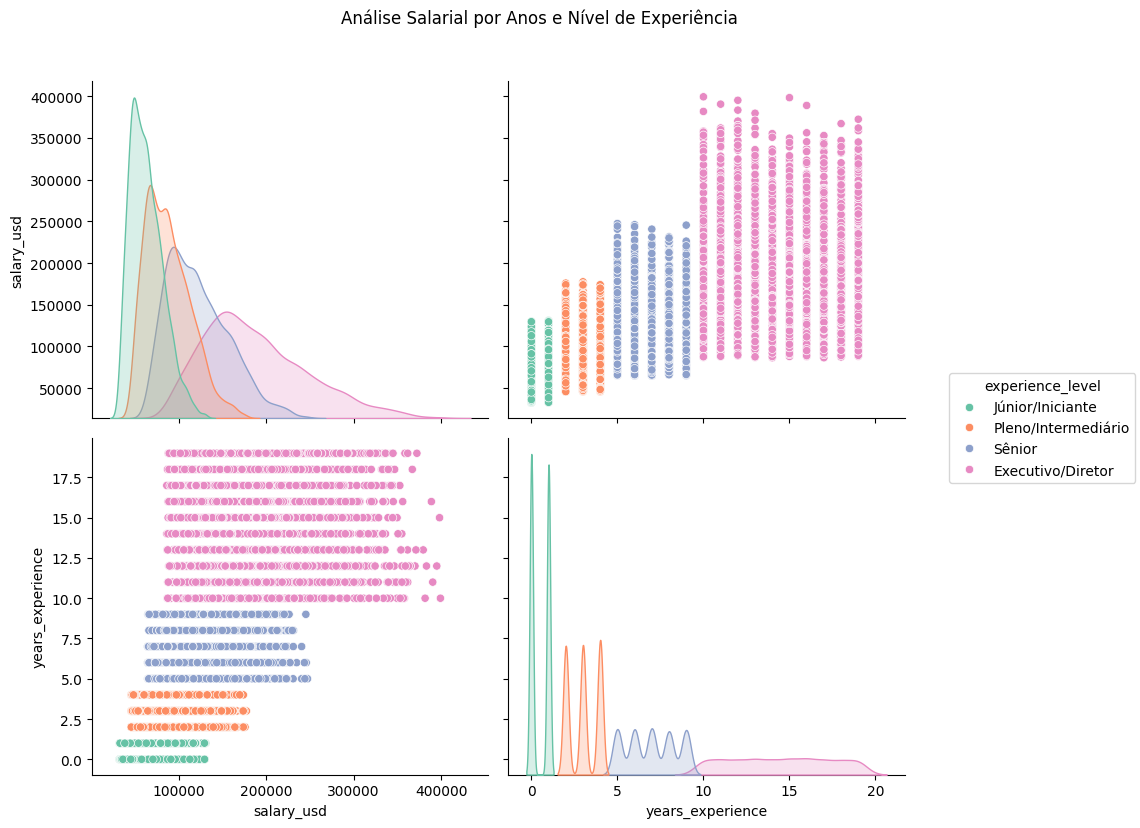

In [16]:
# Ordem desejada dos níveis de experiência
ordem_niveis = ['EN', 'MI', 'SE', 'EX']
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Criação do pairplot com tamanho maior
g = sns.pairplot(
    df,
    vars=['salary_usd', 'years_experience'],
    hue='experience_level',
    palette='Set2',
    hue_order=ordem_niveis,
    height=4,
    aspect=1.2
)

# Título com mais espaço acima
g.fig.suptitle("Análise Salarial por Anos e Nível de Experiência", y=1.03)

# Ajustar os rótulos da legenda conforme dicionário
for t, l in zip(g._legend.texts, ordem_niveis):
    t.set_text(rotulos_experiencia[l])

# Mover a legenda para fora do gráfico
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_frame_on(True)

# Ajustar o layout para acomodar a legenda externa
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

#### Conclusão do gráfico **Análise Salarial por Anos e Nível de Experiência**

O gráfico acima apresenta uma **análise multivariada** entre duas variáveis numéricas — **`salary_usd` (salário em dólares)** e **`years_experience` (anos de experiência)** — segmentadas por quatro categorias de **nível de experiência profissional**. Cada ponto representa um indivíduo, enquanto as distribuições nas diagonais reforçam a **frequência dos dados em cada grupo**. Observa-se uma **relação direta entre os níveis de experiência e os valores das variáveis analisadas**: quanto mais elevado o **`experience_level` (nível de experiência)**, **maior tende a ser o salário e o tempo de atuação na área**.

Notadamente, profissionais do nível **Executivo/Diretor (EX)** concentram-se nas faixas mais altas tanto de **remuneração** quanto de **tempo de carreira**, enquanto os de nível **Júnior/Iniciante (EN)** ocupam as menores faixas salariais e de experiência. A **separação visual clara entre os grupos** reforça a ideia de **progressão linear entre os níveis**, **confirmando a hipótese 7**, de que o **nível de experiência influencia significativamente tanto no salário quanto no acúmulo de anos na profissão**.


## Gráfico pizza e gráfico treemap

O gráfico de **pizza** é uma representação visual usada para mostrar a proporção de cada categoria em relação ao todo, dividindo um círculo em fatias. Cada fatia representa uma parte dos dados, facilitando a compreensão de participações relativas e comparações simples entre categorias. É especialmente útil para destacar percentuais e distribuição de partes dentro de um conjunto.

O gráfico de **treemap** visualiza dados hierárquicos com retângulos proporcionais, facilitando a comparação entre categorias e subcategorias.

#### Gráfico pizza **Top 10 Skills mais frequentes no quartil superior de salários** e Gráfico treemap **Top 10 Skills mais frequentes no quartil superior de salários**

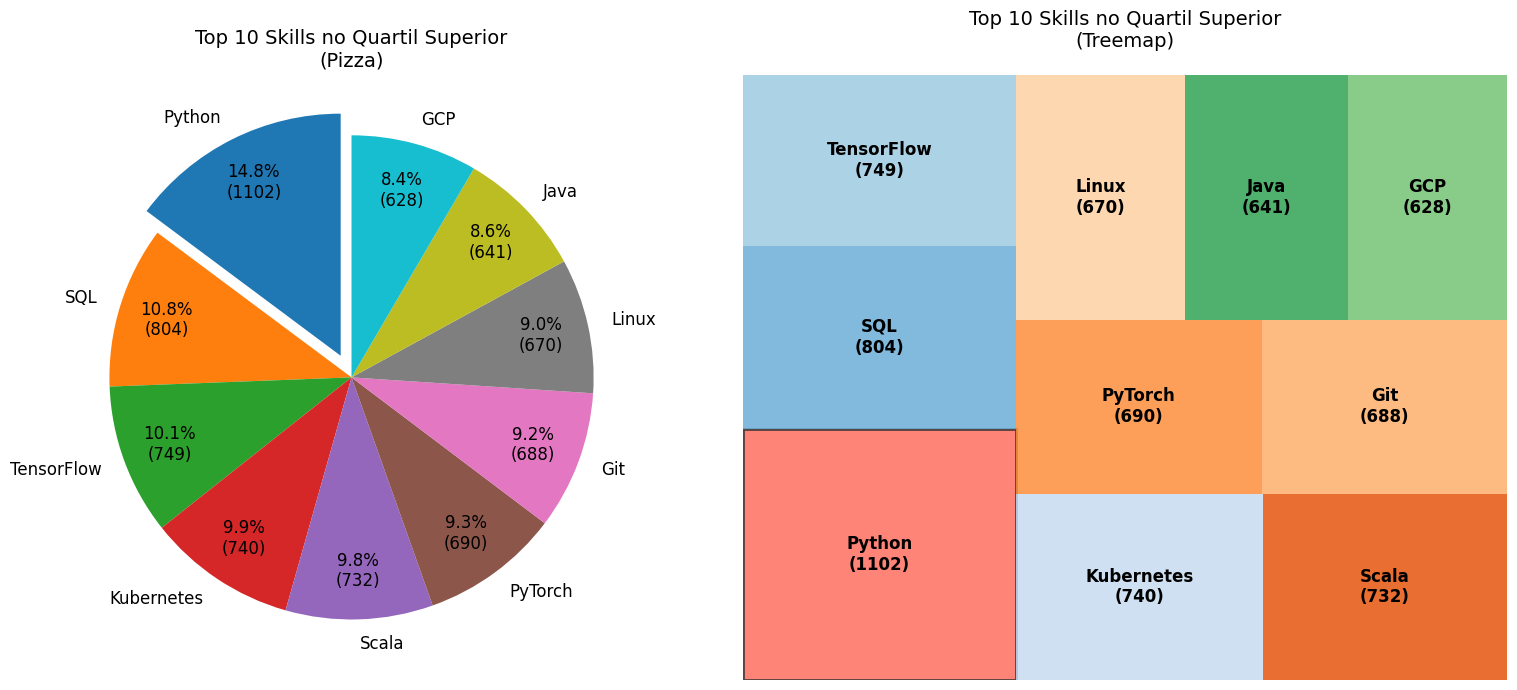

In [17]:
# --- Filtrar o quartil superior de salários ---
quartil_superior = df[df['salary_usd'] > df['salary_usd'].quantile(0.75)]

# --- Concatenar e contar as skills ---
skills_concat = quartil_superior['required_skills'].str.cat(sep=', ')
skills_lista = skills_concat.split(', ')
skills_frequencia = pd.Series(skills_lista).value_counts()
skills_mais_frequentes = skills_frequencia.sort_values(ascending=False).head(10)

# --- Dados para os gráficos ---
valores = skills_mais_frequentes.values
indices = skills_mais_frequentes.index
labels_pizza = indices
labels_treemap = [f'{skill}\n({val})' for skill, val in zip(indices, valores)]

# --- Função para formatar rótulo no gráfico de pizza ---
def formatar_label(pct, allvals):
    valor_absoluto = int(round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}%\n({valor_absoluto})'

# --- Paleta de cores ---
cores_pizza = plt.cm.tab10.colors
cores_treemap = plt.cm.tab20c(range(len(valores)))
cores_treemap[0] = mcolors.to_rgba('#FF6F61', alpha=0.9)
cores_treemap = [mcolors.to_rgba(c, alpha=0.9) for c in cores_treemap]

# --- Criar figura com subplots lado a lado ---
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# --- Gráfico de Pizza ---
axs[0].pie(
    valores,
    labels=labels_pizza,
    autopct=lambda pct: formatar_label(pct, valores),
    startangle=90,
    pctdistance=0.8,
    colors=cores_pizza,
    explode=[0.1] + [0] * (len(valores) - 1),
    textprops={'fontsize': 12}
)
axs[0].set_title('Top 10 Skills no Quartil Superior\n(Pizza)', fontsize=14)

# --- Treemap ---
squarify.plot(
    sizes=valores,
    label=labels_treemap,
    color=cores_treemap,
    alpha=0.85,
    text_kwargs={
        'fontsize': 12,
        'color': 'black',
        'fontweight': 'bold'
    },
    ax=axs[1],
    pad=False
)
axs[1].set_title('Top 10 Skills no Quartil Superior\n(Treemap)', fontsize=14, pad=20)
axs[1].axis('off')

# Borda para a skill mais frequente no treemap
axs[1].patches[0].set_edgecolor('#333333')
axs[1].patches[0].set_linewidth(2)

# Layout final
plt.tight_layout()
plt.show()


#### Conclusão do gráfico pizza **Top 10 Skills mais frequentes no quartil superior de salários** e gráfico treemap **Top 10 Skills mais frequentes no quartil superior de salários**

O gráfico **pizza** acima, baseado nas colunas **`salary_usd` (salário em dólares)** e **`required_skills` (habilidades exigidas)**, demonstra que as principais skills dos profissionais no quartil mais bem remunerado são **principalmente Python, seguido de SQL e TensorFlow**, **confirmando a hipótese 3**, de que sim, há similaridades de skills entre os profissionais de IA mais bem remunerados.

O gráfico **treemap** é apenas uma outra maneira de analisar os dados demonstrados no gráfico pizza, de modo que as principais skills dos profissionais no quartil mais bem remunerado são **principalmente Python, seguido de SQL e TensorFlow**.

## Gráfico de **Barra Horizontal de Composição Percentual**

Todas as barras somam 100%, e cada segmento representa a proporção de uma categoria.

#### Gráfico **Distribuição Percentual por Faixa Salarial (USD)** e Tabela de **Distribuição Percentual por Faixa Salarial (USD)**


Distribuição Percentual por Faixa Salarial (USD)
+----------------------+------------------+
| Faixa Salarial (USD) | Distribuição (%) |
+----------------------+------------------+
| $0k-$50k             | 7.6              |
| $50k-$100k           | 42.6             |
| $100k-$150k          | 26.3             |
| $150k-$200k          | 13.6             |
| $200k-$250k          | 5.9              |
| $250k-$300k          | 2.7              |
| $300k-$399k          | 1.3              |
+----------------------+------------------+


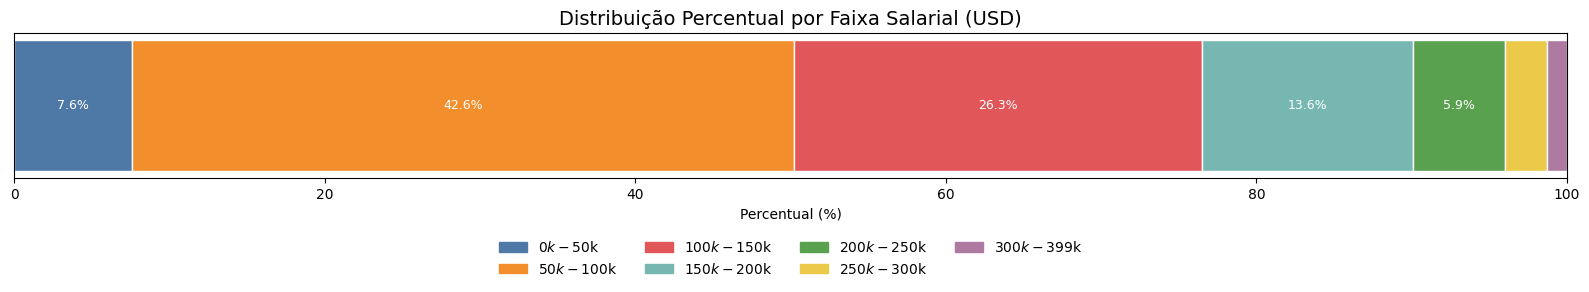

In [18]:
# Barra Horizontal de Composição Percentual e Tabela Distribuição Percentual por Faixa Salarial (USD):

# Definir as faixas de salário
faixas = [0, 50000, 100000, 150000, 200000, 250000, 300000, df['salary_usd'].max()]

# Criar categorias com essas faixas
df['faixa_salarial'] = pd.cut(df['salary_usd'], bins=faixas)

# Calcular a distribuição percentual por faixa
distribuicao_faixas = df['faixa_salarial'].value_counts(normalize=True).sort_index() * 100

# Arredondar porcentagem para 1 casa decimal
distribuicao_faixas = distribuicao_faixas.round(1)

# Criar DataFrame formatado
tabela_faixas = pd.DataFrame({
    'Faixa Salarial (USD)': [f"${int(left/1000)}k-${int(right/1000)}k"
                           if not pd.isna(right) else f">${int(left/1000)}k"
                           for left, right in zip(distribuicao_faixas.index.categories.left,
                                                  distribuicao_faixas.index.categories.right)],
    'Distribuição (%)': distribuicao_faixas.values
})

# Exibir a tabela formatada
print("\nDistribuição Percentual por Faixa Salarial (USD)")
print(tabela_faixas.to_markdown(index=False, tablefmt="pretty", stralign="left", numalign="right"))

labels = tabela_faixas['Faixa Salarial (USD)']
percentuais = tabela_faixas['Distribuição (%)']

# Lista de cores distintas (pode ser ajustada)
cores = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc949', '#af7aa1']

# Criar figura com espaço extra para a legenda
fig = plt.figure(figsize=(16, 3))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 0.3])  # 2 linhas: gráfico e legenda

# Gráfico na primeira linha
ax = fig.add_subplot(gs[0])
inicio = 0

for i in range(len(percentuais)):
    ax.barh(0, percentuais[i], left=inicio, color=cores[i], edgecolor='white')
    inicio += percentuais[i]

# Adicionar rótulos sobre a barra
inicio = 0
for i in range(len(percentuais)):
    meio = inicio + percentuais[i]/2
    if percentuais[i] > 5:
        ax.text(meio, 0, f"{percentuais[i]:.1f}%", ha='center', va='center', fontsize=9, color='white')
    inicio += percentuais[i]

# Configurações do gráfico
ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_title("Distribuição Percentual por Faixa Salarial (USD)", fontsize=14)
ax.set_xlabel("Percentual (%)")

# Legenda na segunda linha
legenda_ax = fig.add_subplot(gs[1])
legenda_ax.axis('off')  # Desliga os eixos

# Criar a legenda
legenda_handles = [plt.Rectangle((0, 0), 1, 1, color=cores[i]) for i in range(len(labels))]
legenda = legenda_ax.legend(legenda_handles, labels,
                           loc='center',
                           ncol=min(4, len(labels)),  # Máximo de 4 colunas
                           frameon=False)

plt.tight_layout()
plt.show()

#### Conclusão do gráfico **Distribuição Percentual por Faixa Salarial (USD)** e da Tabela **Distribuição Percentual por Faixa Salarial (USD)**

A análise da distribuição percentual por faixa salarial mostra que o **mercado de IA se concentra majoritariamente em salários entre USD 50.000 e USD 150.000**, abrangendo quase **70% dos registros**. A faixa de **50k–100k USD** lidera com **42,6%**, seguida pela de **100k–150k USD** com **26,3%**. As faixas **extremas**, tanto as mais baixas (0k–50k) quanto as mais altas (acima de 200k), têm **baixa representatividade**.

A distribuição apresenta uma **assimetria leve**, com uma cauda estendida para salários mais altos, mas **sem concentração expressiva** nessas faixas. Isso indica uma **predominância de salários médios** no setor, com **pouca presença de valores extremos**. A **tabela** apresentada **complementa o gráfico**, oferecendo uma **comprovação numérica** das observações visuais.


## Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

#### Dados de **Desvio Padrão dos Atributos Numéricos do dataset**

In [19]:
# Desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
salary_usd,60260.940438
remote_ratio,40.812712
years_experience,5.545768
job_description_length,576.127083
benefits_score,1.450870


#### Conclusão de Dados de **Desvio Padrão dos Atributos Numéricos do dataset**

A análise do **desvio padrão** revela a **variabilidade dos atributos numéricos** no dataset, sendo **`salary_usd` (salário em dólares)** que apresenta a **maior dispersão, de 60.260,94**, indicando uma **ampla variação nos salários**. Já as variações de **`remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto)** e **`years_experience` (anos de experiência) têm veriações moderadas, de 40,81 e 5,55, respectivamente**, enquanto o **`benefits_score`** possui a **menor variabilidade**, de 1,45, sugerindo que os **benefícios são mais homogêneos entre os registros**.

## Gráfico **Scatter Plot** ou **Gráfico de Dispersão**

Apesar de normalmente ser usado para representar a relação entre duas variáveis numéricas, neste caso ele está sendo aplicado para mostrar valores individuais de uma variável numérica (desvio padrão) ao longo de um eixo categórico — o que o caracteriza como uma variação de gráfico de dispersão com eixo categórico.

#### Gráfico **Desvio padrão das médias salariais**

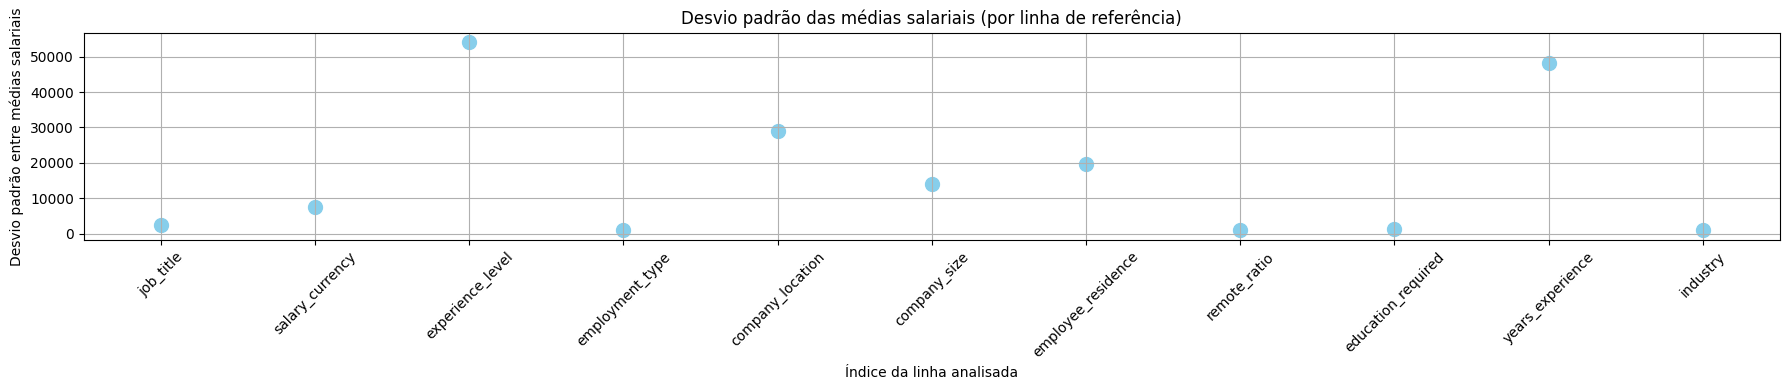

In [20]:
# Gráfico Desvio padrão das médias salariais (por linha de referência):

# Lista de parâmetros categóricos para análise
colunas_categoricas = [
    'job_title', 'salary_currency', 'experience_level',
    'employment_type', 'company_location', 'company_size',
    'employee_residence', 'remote_ratio', 'education_required',
    'years_experience', 'industry'
]

# Lista para armazenar os desvios padrão
stds = []

for idx in colunas_categoricas:
    desvio_padrao_indice = df.groupby(idx)['salary_usd'].mean().std()
    stds.append(desvio_padrao_indice)

# Plotando somente os pontos
plt.figure(figsize=(18, 4))
plt.scatter(colunas_categoricas, stds, color='skyblue', s=100)
plt.title('Desvio padrão das médias salariais (por linha de referência)')
plt.xlabel('Índice da linha analisada')
plt.ylabel('Desvio padrão entre médias salariais')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusão do gráfico **Desvio padrão das médias salariais**

O gráfico de **Desvio Padrão das Médias Salariais**, construído com base na coluna **`salary_usd` (salário em dólares)**, apresenta no eixo **y** a média salarial e no eixo **x** os diferentes **fatores categóricos** do DataFrame. Isso permite observar a **variação salarial média** associada a cada uma das seguintes colunas:

- `job_title`  
- `salary_currency`  
- `experience_level`  
- `employment_type`  
- `company_location`  
- `company_size`  
- `employee_residence`  
- `remote_ratio`  
- `education_required`  
- `years_experience`  
- `industry`  

O gráfico destaca que os **três maiores desvios padrão** das médias salariais ocorrem nas colunas **`experience_level` (nível de experiência)**, **`years_experience` (anos de experiência)** e **`company_location` (localização da empresa)**, respectivamente. Por outro lado, um dos **menores desvios padrão** aparece na coluna **`remote_ratio` (modelo de trabalho: presencial, híbrido ou remoto)**. Todos esses quatro fatores já foram analisados anteriormente neste MVP por meio de gráficos específicos, acompanhados de suas **respectivas conclusões**.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

#### Histograma de **Distribuição de Salários por Tamanho de Empresa**

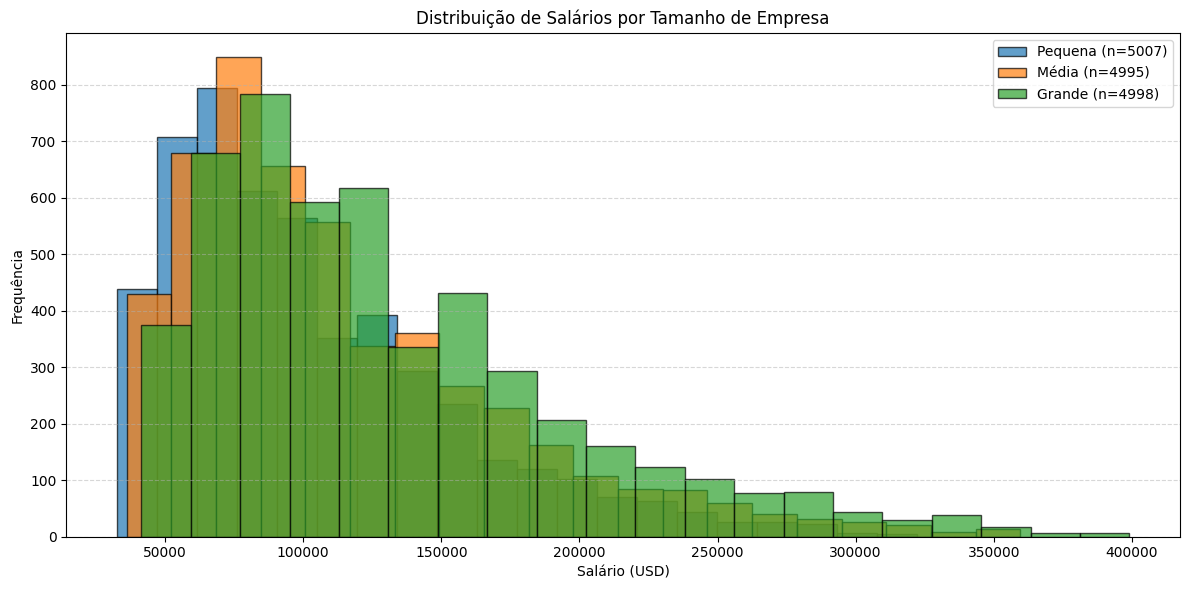

In [21]:
# Histograma de Distribuição de Salários por Tamanho de Empresa
# Ordem desejada dos tamanhos de empresa
ordem_niveis = ['S', 'M', 'L']
rotulos_experiencia = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande',
}

# Configurações do histograma
bins = 20
alpha = 0.7

# Criando a figura
plt.figure(figsize=(12, 6))

# Loop para cada tamanho de empresa
for nivel in ordem_niveis:
    # Filtrando os salários para o tamanho atual
    salarios = df[df['company_size'] == nivel]['salary_usd']

    # Plotando o histograma
    plt.hist(
        salarios,
        bins=bins,
        alpha=alpha,
        label=f"{rotulos_experiencia[nivel]} (n={len(salarios)})",
        edgecolor='black'
    )

# Adicionando detalhes estéticos
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários por Tamanho de Empresa')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusão do histograma de **Distribuição de Salários por Tamanho de Empresa**

O histograma, construído com base nas colunas **`company_size` (tamanho da empresa)** e **`salary_usd` (salário em dólares)**, revela que, independente do porte, a maioria das empresas — sejam pequenas, médias ou grandes — concentra seus salários na faixa entre **USD 50.000 e USD 150.000**, refletindo a predominância desse intervalo no mercado. No entanto, observa-se que as **empresas de grande porte** apresentam uma frequência mais elevada de salários nas faixas superiores, indicando uma **maior propensão a remunerar melhor**. Ainda assim, o gráfico sugere que **empresas de menor porte também podem, pontualmente, oferecer salários competitivos**. Desse modo, a **hipótese 4 foi confirmada**, ou seja, sim, existe correlação entre o tamanho da empresa e o salário do profissional de IA.

## Boxplot

O boxplot é uma representação visual da distribuição de dados que destaca medidas de tendência central, dispersão e possíveis outliers. Ele mostra, de forma compacta, a mediana, os quartis (Q1 e Q3), o intervalo interquartil (IQR) e valores extremos. Essa visualização é especialmente útil para comparar distribuições entre diferentes grupos, identificar assimetrias e detectar valores fora do padrão, facilitando análises rápidas e eficazes em conjuntos de dados variados.

#### Tabela de **Estatísticas Descritivas por Setor (Industry)**

In [22]:
# Agrupar o DataFrame por 'industry' e calcula estatísticas descritivas para cada grupo
df.groupby('industry').describe()

salary_usd                                                  \
                        count           mean           std      min       25%   
industry                                                                        
Automotive             1020.0  113987.241176  60933.399289  33220.0  69710.75   
Consulting             1020.0  117602.142157  62785.427108  33172.0  71083.75   
Education               956.0  116026.803347  59421.133881  33280.0  72406.50   
Energy                  976.0  115188.436475  60614.659866  32519.0  69722.50   
Finance                 984.0  115323.398374  58990.390099  32542.0  70102.50   
Gaming                  967.0  112979.574974  60564.394097  33013.0  66343.50   
Government              998.0  115694.321643  58569.412229  33804.0  72191.75   
Healthcare              997.0  114433.883651  58532.919323  32907.0  69583.00   
Manufacturing           962.0  116162.888773  59407.349576  33314.0  71557.00   
Media                  1045.0  116127.730144  62140.875463  33376.0  68557.00   
Real Estate            1007.0  115919.095333  62191.468740  32587.0  71127.00   
Retail                 1063.0  114776.363123  62418.307070  32692.0  68806.00   
Technology             1011.0  115831.823937  61112.837783  33546.0  70268.00   
Telecommunications      997.0  115291.411234  56923.965679  32666.0  72502.00   
Transportation          997.0  114837.802407  58841.920578  33114.0  71765.00   

                                                  remote_ratio             \
                         50%        75%       max        count       mean   
industry                                                                    
Automotive           97060.5  141036.00  398084.0       1020.0  48.921569   
Consulting          100983.5  145943.00  371087.0       1020.0  49.803922   
Education           101097.5  148061.50  346789.0        956.0  48.692469   
Energy               99057.5  146871.75  381575.0        976.0  48.668033   
Finance             101409.0  145546.50  350761.0        984.0  50.813008   
Gaming               96073.0  147922.50  364635.0        967.0  49.431231   
Government          101914.5  146461.00  343803.0        998.0  49.498998   
Healthcare          101402.0  146248.00  379418.0        997.0  49.297894   
Manufacturing       100007.0  148567.75  364585.0        962.0  49.324324   
Media               100272.0  147970.00  353055.0       1045.0  49.521531   
Real Estate          98126.0  147108.50  394917.0       1007.0  51.191658   
Retail               97938.0  146184.00  399095.0       1063.0  49.341486   
Technology           99539.0  147459.50  383142.0       1011.0  49.703264   
Telecommunications  102408.0  144869.00  339526.0        997.0  48.696088   
Transportation       99330.0  144798.00  388754.0        997.0  49.297894   

                    ... job_description_length         benefits_score  \
                    ...                    75%     max          count   
industry            ...                                                 
Automotive          ...                1989.25  2499.0         1020.0   
Consulting          ...                1995.50  2497.0         1020.0   
Education           ...                1950.00  2499.0          956.0   
Energy              ...                2044.25  2499.0          976.0   
Finance             ...                2030.25  2496.0          984.0   
Gaming              ...                2031.50  2499.0          967.0   
Government          ...                1991.00  2497.0          998.0   
Healthcare          ...                2005.00  2498.0          997.0   
Manufacturing       ...                1987.75  2499.0          962.0   
Media               ...                1996.00  2497.0         1045.0   
Real Estate         ...                1975.00  2499.0         1007.0   
Retail              ...                2028.50  2496.0         1063.0   
Technology          ...                2033.50  2496.0         1011.0   
Telec

#### Conclusão da Tabela de **Estatísticas Descritivas por Setor (Industry)**

Essa tabela, baseada no agrupamento da coluna **`industry` (setor)** e nas estatísticas descritivas da coluna **`salary_usd` (salário em dólares)**, compara estatísticas descritivas (média, desvio padrão, quartis) por setores, ajudando a identificar diferenças, sendo útil para benchmarking.

#### Gráfico **Boxplot de Distribuição de Salários por Setor** e Dados de **Distribuição de Salários por Setor**

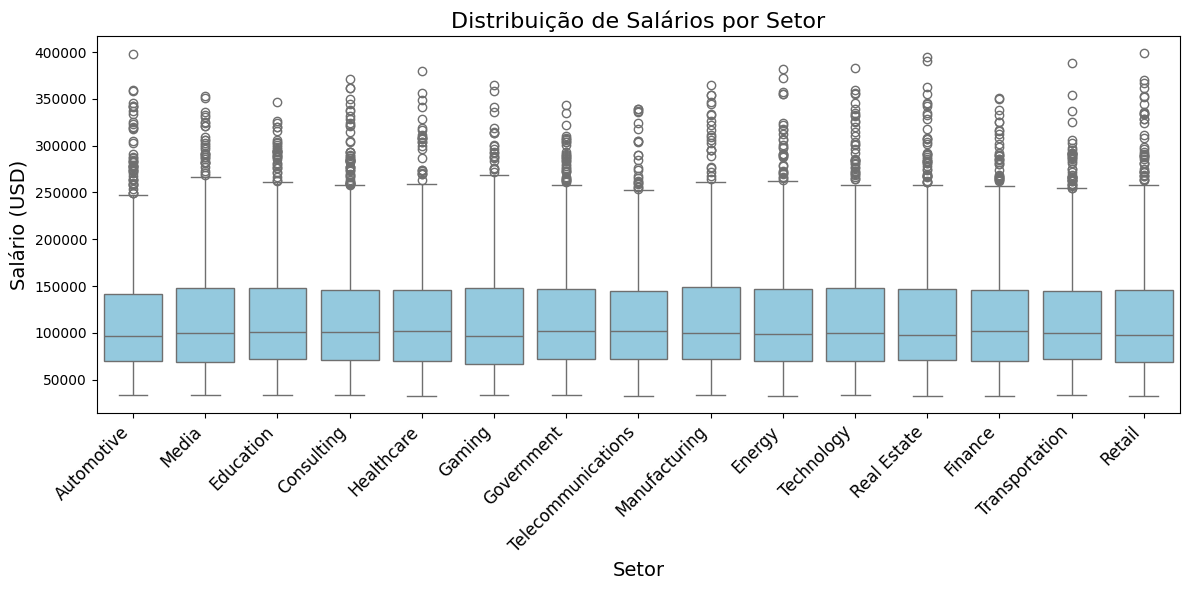


--- Tabela 1: Top 3 Setores com Maior Intervalo Interquartil (IQR) de Salário ---
industry
Gaming    81579.0
Media     79413.0
Retail    77378.0
Name: salary_usd, dtype: float64
--- Média dos IQRs: 75,954.72
--- Desvio Padrão dos IQRs: 2,638.00

--- Tabela 2: Top 3 Setores com Maior Mediana Salarial ---
industry
Telecommunications    102408.0
Government            101914.5
Finance               101409.0
Name: salary_usd, dtype: float64
--- Média das Medianas: 99,774.50
--- Desvio Padrão das Medianas: 1,856.90

--- Tabela 3: Top 3 Setores com Maior Número de Outliers de Salário ---
industry
Consulting     48
Automotive     45
Real Estate    40
Name: salary_usd, dtype: int64
--- Média do Número de Outliers: 33.13
--- Desvio Padrão do Número de Outliers: 8.27


In [23]:
# Gráfico Boxplot de Distribuição de Salários por Setor
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(x='industry', y='salary_usd', data=df, color='skyblue')
plt.title('Distribuição de Salários por Setor', fontsize=16)
plt.xlabel('Setor', fontsize=14)
plt.ylabel('Salário (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Setor ---
iqr_por_industria = df.groupby('industry')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).sort_values(ascending=False)
media_iqr_ind = iqr_por_industria.mean()
desvio_iqr_ind = iqr_por_industria.std()

# --- Cálculo 2: Mediana de Salários por Setor ---
medianas_por_industria = df.groupby('industry')['salary_usd'].median().sort_values(ascending=False)
media_medianas_ind = medianas_por_industria.mean()
desvio_medianas_ind = medianas_por_industria.std()

# --- Cálculo 3: Outliers por Setor ---
outliers_por_industria = df.groupby('industry')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).sort_values(ascending=False)
media_outliers_ind = outliers_por_industria.mean()
desvio_outliers_ind = outliers_por_industria.std()

# --- Exibição dos resultados ---
print("\n--- Tabela 1: Top 3 Setores com Maior Intervalo Interquartil (IQR) de Salário ---")
print(iqr_por_industria.head(3))
print(f"--- Média dos IQRs: {media_iqr_ind:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr_ind:,.2f}")

print("\n--- Tabela 2: Top 3 Setores com Maior Mediana Salarial ---")
print(medianas_por_industria.head(3))
print(f"--- Média das Medianas: {media_medianas_ind:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas_ind:,.2f}")

print("\n--- Tabela 3: Top 3 Setores com Maior Número de Outliers de Salário ---")
print(outliers_por_industria.head(3))
print(f"--- Média do Número de Outliers: {media_outliers_ind:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers_ind:,.2f}")

#### Conclusão do gráfico **Boxplot de Distribuição de Salários por Setor** e Dados de **Distribuição de Salários por Setor**

A análise da variabilidade salarial entre as diferentes **setores** da área de Inteligência Artificial, baseada na coluna **`industry` (setor)**, e utilizando os valores salariais da coluna **`salary_usd` (salário em dólares)**, revela que os **Top 3 setores com maior Intervalo Interquartil (IQR)** e **maior mediana salarial** apresentam valores **ligeiramente acima da média**, mas ainda **dentro de até 2 desvios padrão**. Isso indica **variações salariais esperadas** e compatíveis com a distribuição geral dos dados.

No caso da **quantidade de outliers salariais**, os setores de **Consultoria**, **Automotivo** e **Imobiliário** se destacam com números significativamente **acima da média**, especialmente o setor de **Consultoria**, com **48 outliers** — valor **próximo a 2 desvios padrão acima da média**, sugerindo uma **maior concentração de salários extremos** nesse setor.

Apesar dessas variações, a distribuição salarial entre as setores analisadas **não apresenta distorções graves**, indicando uma **estrutura salarial relativamente equilibrada**, **negando a hipótese 5**, ou seja, não, os profissionais de diferentes ramificações da IA não têm remunerações diferentes.

#### Gráfico **Boxplot de Distribuição de Salários por Job Title (Área de Atuação)** e Dados de **Distribuição de Salários por Job Title (Área de Atuação)**

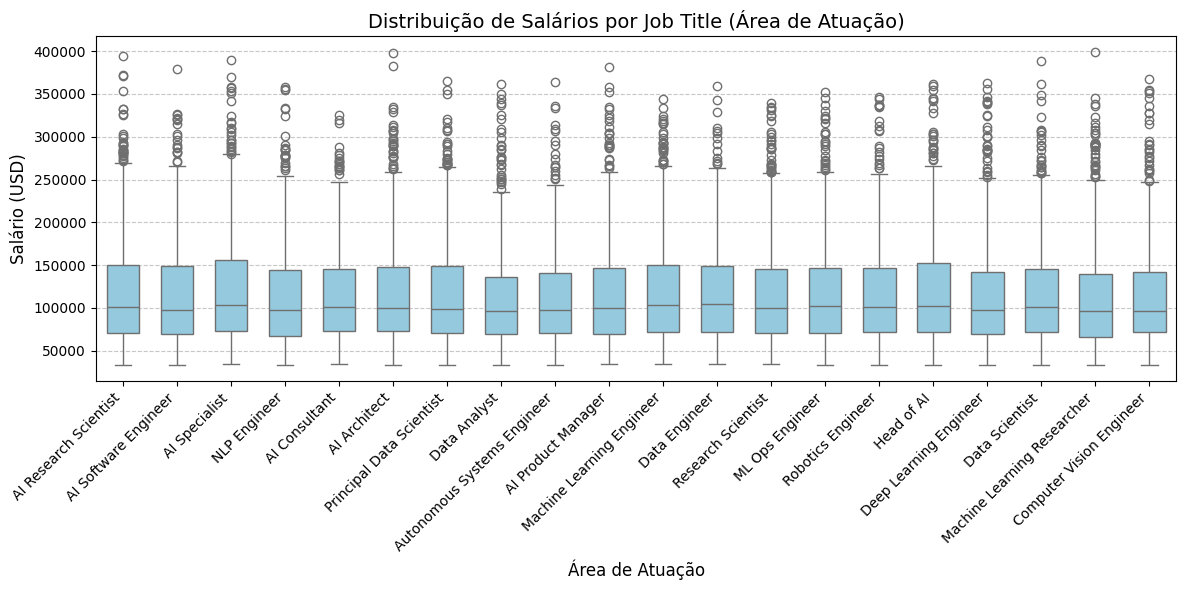


--- Tabela 1: Top 3 Ramos com Maior Intervalo Interquartil (IQR) de Salário ---
job_title
AI Specialist            82793.25
AI Research Scientist    80048.25
Head of AI               79701.00
Name: salary_usd, dtype: float64
--- Média dos IQRs: 75,605.07
--- Desvio Padrão dos IQRs: 3,748.75

--- Tabela 2: Top 3 Ramos com Maior Mediana Salarial ---
job_title
Data Engineer                104447.0
Machine Learning Engineer    103687.0
AI Specialist                103626.5
Name: salary_usd, dtype: float64
--- Média das Medianas: 99,797.30
--- Desvio Padrão das Medianas: 2,540.63

--- Tabela 3: Top 3 Ramos com Maior Número de Outliers de Salário ---
job_title
Machine Learning Researcher    35
AI Architect                   31
Research Scientist             30
Name: salary_usd, dtype: int64
--- Média do Número de Outliers: 24.55
--- Desvio Padrão do Número de Outliers: 5.41


In [24]:
# Gráfico Boxplot de Distribuição de Salários por Ramo da IA
plt.figure(figsize=(12, 6))

# Criando o boxplot
sns.boxplot(
    data=df,
    x="job_title",
    y="salary_usd",
    color="skyblue",
    width=0.6
)

# Ajustes estéticos
plt.title("Distribuição de Salários por Job Title (Área de Atuação)", fontsize=14)
plt.xlabel("Área de Atuação", fontsize=12)
plt.ylabel("Salário (USD)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Ramo da IA (job_title) ---
iqr_por_ramo = df.groupby('job_title')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).sort_values(ascending=False)
media_iqr = iqr_por_ramo.mean()
desvio_iqr = iqr_por_ramo.std()

# --- Cálculo 2: Mediana de Salários por Ramo da IA (job_title) ---
mediana_por_ramo = df.groupby('job_title')['salary_usd'].median().sort_values(ascending=False)
media_medianas = mediana_por_ramo.mean()
desvio_medianas = mediana_por_ramo.std()

# --- Cálculo 3: Outliers por Ramo da IA (job_title) ---
outliers_por_ramo = df.groupby('job_title')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).sort_values(ascending=False)
media_outliers = outliers_por_ramo.mean()
desvio_outliers = outliers_por_ramo.std()

# --- Exibição dos resultados ---
print("\n--- Tabela 1: Top 3 Ramos com Maior Intervalo Interquartil (IQR) de Salário ---")
print(iqr_por_ramo.head(3))
print(f"--- Média dos IQRs: {media_iqr:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr:,.2f}")

print("\n--- Tabela 2: Top 3 Ramos com Maior Mediana Salarial ---")
print(mediana_por_ramo.head(3))
print(f"--- Média das Medianas: {media_medianas:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas:,.2f}")

print("\n--- Tabela 3: Top 3 Ramos com Maior Número de Outliers de Salário ---")
print(outliers_por_ramo.head(3))
print(f"--- Média do Número de Outliers: {media_outliers:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers:,.2f}")

#### Conclusão do gráfico **Boxplot de Distribuição de Salários por Job Title (Área de Atuação)** e Dados de **Distribuição de Salários por Job Title (Área de Atuação)**

A análise da **variabilidade salarial nos diferentes ramos da Inteligência Artificial**, com base na coluna **`job_title` (área de atuação)** e utilizando os valores da coluna **`salary_usd` (salário em dólares)**,  mostra que os **Top 3 cargos com maior IQR e mediana salarial** apresentam **valores ligeiramente acima da média**, porém **dentro de um intervalo de até 2 desvios padrão**, indicando **variações esperadas e consistentes com o conjunto de dados**.

Já no caso do **número de outliers**, os **Top 3 cargos apresentam valores acima da média e mais distantes**, especialmente o cargo de **Machine Learning Researcher**, com **35 outliers**, que se aproxima de **2 desvios padrão acima da média**, sugerindo uma **maior concentração de salários extremos** nesse caso específico.

Por fim, apesar de existirem ramos com **maior número de outliers**, é possível perceber uma **distribuição salarial relativamente homogênea entre os cargos analisados**, **sem evidências de distorções severas**, **negando a hipótese 6**, ou seja, não, o setor da empresa não altera o salário do profissional de IA.

#### Gráfico **Boxplot de Distribuição de Salários por Nível de Experiência** e Dados de **Distribuição de Salários por Nível de Experiência**

/tmp/ipython-input-25-1819457572.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([rotulos_experiencia[n] for n in ordem_niveis], rotation=45, ha='right', fontsize=12)


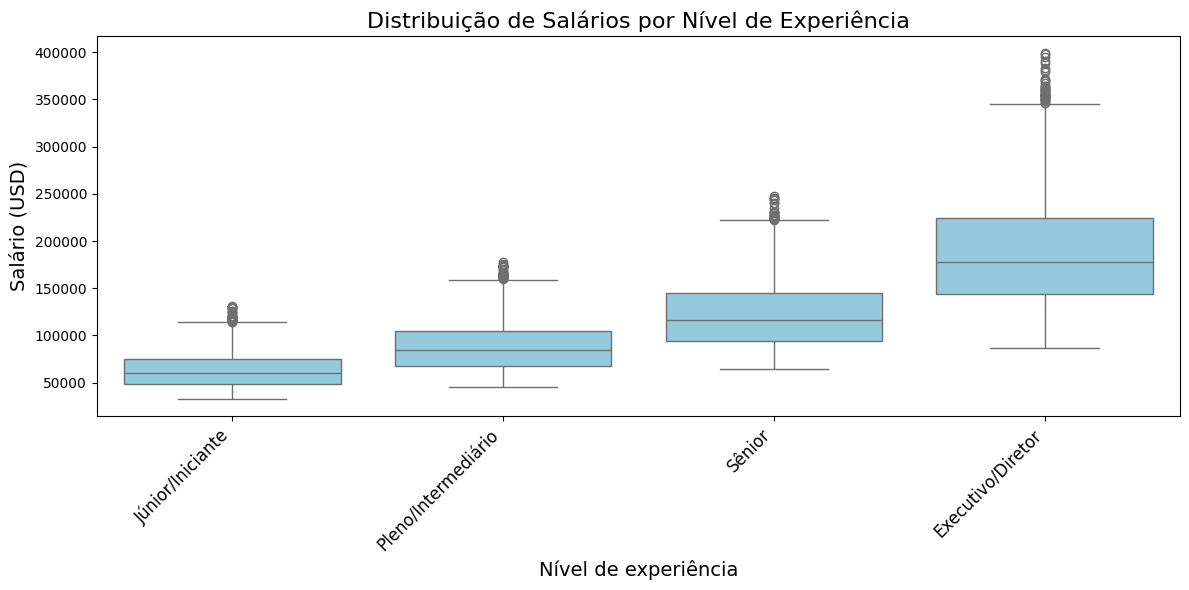


--- Tabela 1: Intervalo Interquartil (IQR) de Salário por Nível de Experiência ---
experience_level
Júnior/Iniciante       26350.5
Pleno/Intermediário    36862.0
Sênior                 51142.0
Executivo/Diretor      80583.5
--- Média dos IQRs: 48,734.50
--- Desvio Padrão dos IQRs: 23,538.30

--- Tabela 2: Mediana Salarial por Nível de Experiência ---
experience_level
Júnior/Iniciante        60373.5
Pleno/Intermediário     84641.0
Sênior                 116907.0
Executivo/Diretor      177512.0
--- Média das Medianas: 109,858.38
--- Desvio Padrão das Medianas: 50,699.65

--- Tabela 3: Número de Outliers de Salário por Nível de Experiência ---
experience_level
Júnior/Iniciante       38
Pleno/Intermediário    39
Sênior                 31
Executivo/Diretor      42
--- Média do Número de Outliers: 37.50
--- Desvio Padrão do Número de Outliers: 4.65


In [25]:
# Gráfico Boxplot de Distribuição de Salários por Nível de Experiência
# Ordem desejada dos níveis de experiência
ordem_niveis = ['EN', 'MI', 'SE', 'EX']
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

plt.figure(figsize=(12, 6))

# Criar boxplot com ordem correta dos níveis
ax = sns.boxplot(x='experience_level', y='salary_usd', data=df, color='skyblue', order=ordem_niveis)
plt.title('Distribuição de Salários por Nível de Experiência', fontsize=16)
plt.xlabel('Nível de experiência', fontsize=14)
plt.ylabel('Salário (USD)', fontsize=14)
# Atualizar os rótulos do eixo x para os nomes legíveis
ax.set_xticklabels([rotulos_experiencia[n] for n in ordem_niveis], rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Nível de Experiência ---
iqr_por_experiencia = df.groupby('experience_level')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).reindex(['EN', 'MI', 'SE', 'EX'])
media_iqr_exp = iqr_por_experiencia.mean()
desvio_iqr_exp = iqr_por_experiencia.std()

# --- Cálculo 2: Mediana de Salários por Nível de Experiência ---
mediana_por_experiencia = df.groupby('experience_level')['salary_usd'].median().reindex(['EN', 'MI', 'SE', 'EX'])
media_medianas_exp = mediana_por_experiencia.mean()
desvio_medianas_exp = mediana_por_experiencia.std()

# --- Cálculo 3: Outliers por Nível de Experiência ---
outliers_por_experiencia = df.groupby('experience_level')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).reindex(['EN', 'MI', 'SE', 'EX'])
media_outliers_exp = outliers_por_experiencia.mean()
desvio_outliers_exp = outliers_por_experiencia.std()

# --- Rótulos legíveis ---
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# --- Exibição dos resultados completos ---
print("\n--- Tabela 1: Intervalo Interquartil (IQR) de Salário por Nível de Experiência ---")
print(iqr_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média dos IQRs: {media_iqr_exp:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr_exp:,.2f}")

print("\n--- Tabela 2: Mediana Salarial por Nível de Experiência ---")
print(mediana_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média das Medianas: {media_medianas_exp:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas_exp:,.2f}")

print("\n--- Tabela 3: Número de Outliers de Salário por Nível de Experiência ---")
print(outliers_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média do Número de Outliers: {media_outliers_exp:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers_exp:,.2f}")

#### Conclusão do gráfico **Boxplot de Distribuição de Salários por Nível de Experiência** e Dados de **Distribuição de Salários por Nível de Experiência**

A análise da distribuição salarial por **nível de experiência**, com base na coluna **`experience_level` (nível de experiência)** e nos valores salariais da coluna **`salary_usd` (salário em dólares)**, evidencia um crescimento progressivo tanto no **Intervalo Interquartil (IQR)** quanto na **mediana salarial** à medida que se avança na carreira. O grupo de **Executivos/Diretores** apresenta o maior IQR (**80.583,5**) e a maior mediana salarial (**177.512,0**), valores **acima da média e superiores a 1 desvio padrão**, sugerindo uma faixa salarial ampla e remuneração central elevada para os profissionais mais experientes.

Por outro lado, os profissionais **Júnior/Iniciante** têm o menor IQR (**26.350,5**) e a menor mediana salarial (**60.373,5**), indicando **maior uniformidade e menor remuneração** entre os profissionais no início da carreira.

Quanto ao **número de outliers salariais**, os valores são relativamente próximos da média (**37,5**), variando entre **31 e 42**. No entanto, o grupo **Sênior**, com **31 outliers**, apresenta um valor **abaixo do limite inferior de 1 desvio padrão** (32,85), o que sugere uma **menor ocorrência de salários extremos** nessa faixa. Os demais níveis estão dentro do intervalo esperado.

Em resumo, os dados apontam para uma **estrutura salarial escalonada conforme o avanço na experiência**, com **incremento esperado de variabilidade e remuneração**, e uma **distribuição de outliers relativamente homogênea**, com exceção do grupo sênior.

## Matriz de Correlação

A **matriz de correlação** é uma ferramenta fundamental na análise exploratória de dados, pois permite visualizar de forma clara o **grau de relacionamento linear entre variáveis numéricas**, por meio de coeficientes e cores. Cada célula da matriz indica a **força e a direção da correlação** entre dois atributos: valores próximos de **1** indicam **forte correlação positiva**, próximos de **-1** apontam **forte correlação negativa**, e valores próximos de **0** sugerem **ausência de correlação linear**. Essa análise é especialmente útil para identificar padrões, redundâncias ou possíveis variáveis relevantes na construção de modelos preditivos.


#### Gráfico **Matriz de Correlação das Características Numéricas**

In [26]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.select_dtypes(include=[np.number]).corr()


Matriz de Correlação:


,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,1.000000,0.013727,0.737556,-0.009092,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000


#### Gráfico **Matriz de Correlação**

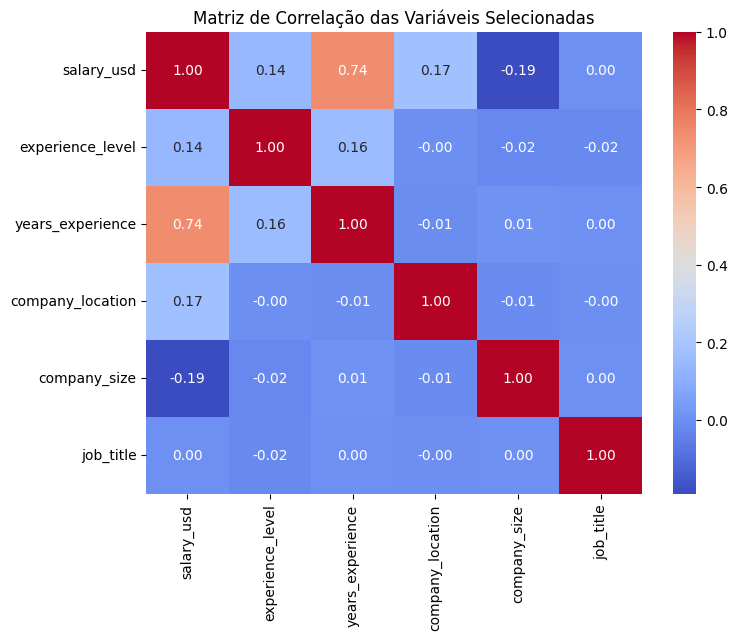

In [27]:
# Gráfico de Correlação entre Variáveis Selecionadas
# Usando as variáveis de maior desvio padrão/correlação: experience_level, years_experience, company_location, company_size, job_title

# Seleciona as colunas desejadas
cols = ['salary_usd','experience_level', 'years_experience', 'company_location', 'company_size', 'job_title']

# Cria uma cópia do DataFrame apenas com essas colunas
df_corr = df[cols].copy()

# Converte colunas categóricas para códigos numéricos usando Label Encoding
# Converte categorias em números inteiros (ex: Júnior → 0, Pleno → 1, Sênior → 2)
for col in ['experience_level', 'company_location', 'company_size', 'job_title']:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.show()

#### Conclusão do gráfico **Matriz de Correlação**:

A análise da **matriz de correlação**, construída a partir das colunas `salary_usd`, `experience_level`, `years_experience`, `company_location`, `company_size` e `job_title`, mostra que a variável com **maior associação ao `salary_usd` (salário em dólares) é `years_experience` (anos de experiência)**, com uma **correlação positiva forte** (≈ **0,74**). Esse resultado indica que **profissionais com mais tempo de atuação na área tendem a receber salários significativamente maiores**.

Em paralelo, o **`experience_level` (nível de experiência)** apresenta uma **correlação positiva mais fraca** em relação ao salário. Isso sugere que apenas a **classificação formal por nível hierárquico** não capta toda a variação salarial, sendo **menos determinante do que os anos efetivos de atuação**.

O **`company_size` (tamanho da empresa)** apresenta uma **correlação negativa leve** (≈ **-0,19**) com o salário, o que indica a possibilidade de que, **pontualmente, empresas menores podem oferecer remunerações competitivas**.

A variável **`company_location` (localização da empresa)** possui uma **correlação positiva fraca** (≈ **0,17**), revelando que a **geografia exerce impacto modesto** sobre os salários.

Por fim, variáveis como **`job_title` (área de atuação)** apresentam **correlação próxima de zero**, indicando que **não há uma relação linear significativa com o salário**.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   job_id                  15000 non-null  object  
 1   job_title               15000 non-null  object  
 2   salary_usd              15000 non-null  int64   
 3   salary_currency         15000 non-null  object  
 4   experience_level        15000 non-null  object  
 5   employment_type         15000 non-null  object  
 6   company_location        15000 non-null  object  
 7   company_size            15000 non-null  object  
 8   employee_residence      15000 non-null  object  
 9   remote_ratio            15000 non-null  int64   
 10  required_skills         15000 non-null  object  
 11  education_required      15000 non-null  object  
 12  years_experience        15000 non-null  int64   
 13  industry                15000 non-null  object  
 14  posting_date          

O resultado do código **`df.info()`** mostra **informações básicas da tabela `df`**:

- **Quantidade de linhas**: **15.000 registros**  
- **Quantidade de colunas**: **20 colunas**  
- **Tipos de dados** em cada coluna (como **números inteiros**, **textos**, **datas**, etc.)  
- Indicação de **valores ausentes** em alguma coluna (neste caso, **todas estão completas**)

Essas informações ajudam a **entender o que precisa ser transformado ou preparado** antes de alimentar um **modelo de machine learning**.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [29]:
# Separar features (X) e target (y)
# Aqui, temos uma tabela (df) com várias colunas, incluindo a coluna salary_usd (salário em dólar)
# X vai conter todas as colunas exceto o salário — ou seja, são os dados que queremos usar para prever o salário (por exemplo: cargo, empresa, localização, etc.)
# y vai conter somente a coluna de salário — que é o que queremos prever com o modelo
X = df.drop('salary_usd', axis=1)
y = df['salary_usd']

## Tratamento de Valores Nulos

Embora o dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) **não apresente valores nulos**, a verificação de dados ausentes continua sendo uma **etapa essencial em qualquer análise de dados**, sendo esse tratamento crucial para garantir a integridade e a qualidade dos modelos, podendo envolver **imputação** (com média, mediana ou moda) ou até a **remoção de registros ou colunas**, dependendo do impacto e da natureza das informações ausentes.

# Normalização dos dados:

Nesse MVP, serão testadas as padronizações `MinMaxScaler` e o `StandardScaler`, que são técnicas de **pré-processamento de dados** utilizadas para ajustar **escalas numéricas**, evitando que variáveis com amplitudes maiores dominem o aprendizado de modelos de *machine learning*. Ambos têm o objetivo de colocar os dados em uma base comum, mas fazem isso de maneiras diferentes:

#### MinMaxScaler
- **O que faz:** Reescala os dados para que todos os valores fiquem dentro de um intervalo específico — geralmente entre **0 e 1**.
- **Preserva:** A **proporção relativa** entre os valores originais.

#### **StandardScaler**
- **O que faz:** Realiza a **padronização** transformando os dados para que tenham **média 0 e desvio padrão 1**.
- ___*Baseado em:* Conceito de **distribuição normal padrão** (*z-score*).___

In [30]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset utilizado:")
X.isnull().sum()

Valores nulos no dataset utilizado:


,0
job_id,0
job_title,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0
required_skills,0


## Padronização por MinMaxScaler

A **normalização** serve para **ajustar os valores numéricos** (como **salários**, **anos de experiência**, etc.) para que **fiquem em uma mesma escala**, geralmente entre **0 e 1**.

Isso é útil porque **muitos algoritmos de machine learning funcionam melhor quando todos os dados estão na mesma faixa de valores**, evitando que variáveis com escalas maiores dominem o processo de aprendizado.

Dessa forma, os dados serão **preparados para que fiquem "em pé de igualdade"**. Por quê? Porque alguns valores, como o **salário** ou o **tempo de experiência**, podem ter **números muito altos**, enquanto outros têm **números baixos**.

Isso poderia **bagunçar o aprendizado da máquina**, já que variáveis em escalas muito diferentes podem influenciar desproporcionalmente o modelo. A **normalização** deixa **tudo na mesma escala**, **facilitando para que o modelo aprenda melhor**.

In [31]:
# Inicializar o normalizador MinMaxScaler
scaler_norm = MinMaxScaler()

In [32]:
# Descobrindo e selecionando apenas as colunas numéricas
# Com a linha de código abaixo, tenho uma lista com os nomes de todas as colunas numéricas do DataFrame X, armazenada na variável numerical_columns
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()

# Exibe a quantidade e os nomes das colunas numéricas
print(f"Quantidade de colunas numéricas: {len(numerical_columns)}")
print("Nomes das colunas numéricas:", numerical_columns)

X[numerical_columns].describe()

Quantidade de colunas numéricas: 4
Nomes das colunas numéricas: ['remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']


,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,49.483333,6.253200,1503.314733,7.504273
std,40.812712,5.545768,576.127083,1.450870
min,0.000000,0.000000,500.000000,5.000000
25%,0.000000,2.000000,1003.750000,6.200000
50%,50.000000,5.000000,1512.000000,7.500000
75%,100.000000,10.000000,2000.000000,8.800000
max,100.000000,19.000000,2499.000000,10.000000


O código abaixo **normaliza os dados numéricos**, ou seja, **ajustando os números para uma escala comum entre 0 e 1**.

Primeiro, ele **aprende a escala dos dados de treino** e depois **aplica essa mesma escala aos dados numéricos**.

Isso **ajuda o modelo a aprender melhor** e **evita distorções causadas por diferenças de tamanho entre os números**.

In [33]:
# Aprende o mínimo e o máximo dos dados numéricos do dataset
# Aqui, o código ensina ao normalizador quais são os menores e maiores valores de cada coluna
scaler_norm.fit(X[numerical_columns])

# Normalizar os dados de treino
# Agora, ele transforma os valores das colunas numéricas com base no que aprendeu acima
# Exemplo: se years_experience vai de 0 a 10, um valor 5 vira 0.5
X_normalized_numerical_values = scaler_norm.transform(X[numerical_columns])

In [34]:
# Cria uma cópia do DataFrame original X para preservar os dados originais
X_normalized_minmax = X.copy()

# Aplica a normalização Min-Max apenas nas colunas numéricas, substituindo seus valores
X_normalized_minmax[numerical_columns] = X_normalized_numerical_values

# Mostra as 5 primeiras linhas do DataFrame normalizado para verificação
X_normalized_minmax.head()

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,faixa_salarial
0,AI00001,AI Research Scientist,USD,SE,CT,China,M,China,0.5,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,0.473684,Automotive,2024-10-18,2024-11-07,0.288144,0.18,Smart Analytics,"(50000, 100000]"
1,AI00002,AI Software Engineer,USD,EN,CT,Canada,M,Ireland,1.0,"Deep Learning, AWS, Mathematics, Python, Docker",Master,0.052632,Media,2024-11-20,2025-01-11,0.384192,0.04,TechCorp Inc,"(50000, 100000]"
2,AI00003,AI Specialist,USD,MI,FL,Switzerland,L,South Korea,0.0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,0.105263,Education,2025-03-18,2025-04-07,0.737369,0.88,Autonomous Tech,"(150000, 200000]"
3,AI00004,NLP Engineer,USD,SE,FL,India,M,India,0.5,"Scala, SQL, Linux, Python",PhD,0.368421,Consulting,2024-12-23,2025-02-24,0.422711,0.72,Future Systems,"(50000, 100000]"
4,AI00005,AI Consultant,EUR,EN,PT,France,S,Singapore,1.0,"MLOps, Java, Tableau, Python",Master,0.000000,Media,2025-04-15,2025-06-23,0.744872,0.32,Advanced Robotics,"(50000, 100000]"


In [35]:
# Mostra as últimas 5 linhas do DataFrame X_normalized_minmax
# Útil para verificar se a normalização foi aplicada corretamente em todo o conjunto de dados
X_normalized_minmax.tail()

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,faixa_salarial
14995,AI14996,Robotics Engineer,USD,EN,FL,Finland,S,Finland,0.5,"Java, Kubernetes, Azure",Bachelor,0.052632,Energy,2025-02-06,2025-03-25,0.567784,0.58,Advanced Robotics,"(0, 50000]"
14996,AI14997,Machine Learning Researcher,GBP,EN,CT,United Kingdom,M,United Kingdom,0.0,"Mathematics, Docker, SQL, Deep Learning",Master,0.000000,Government,2024-10-16,2024-10-30,0.562281,0.64,Smart Analytics,"(50000, 100000]"
14997,AI14998,NLP Engineer,USD,EX,CT,South Korea,L,South Korea,0.5,"Scala, Spark, NLP",Associate,0.894737,Manufacturing,2024-03-19,2024-05-02,0.418209,0.48,AI Innovations,"(150000, 200000]"
14998,AI14999,Head of AI,EUR,EN,FT,Netherlands,M,Netherlands,0.0,"Java, Computer Vision, Python, TensorFlow",PhD,0.052632,Real Estate,2024-03-22,2024-04-23,0.717859,0.12,Smart Analytics,"(50000, 100000]"
14999,AI15000,Computer Vision Engineer,USD,MI,PT,Austria,S,Austria,0.5,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,0.105263,Technology,2024-07-18,2024-08-10,0.996498,0.52,AI Innovations,"(50000, 100000]"


### Resumo Estatístico das Variáveis Normalizadas (Mínimo= 0, Máximo = 1)

O resumo abaixo indica que os dados passaram por um processo de normalização — ou seja, foram transformados para terem **mínimo 0 e máximo 1**.

In [36]:
X_normalized_minmax.describe().round(3)

,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000,15000.000,15000.000,15000.000
mean,0.495,0.329,0.502,0.501
std,0.408,0.292,0.288,0.290
min,0.000,0.000,0.000,0.000
25%,0.000,0.105,0.252,0.240
50%,0.500,0.263,0.506,0.500
75%,1.000,0.526,0.750,0.760
max,1.000,1.000,1.000,1.000


### Visualização da distribuição antes e depois da normalização

O histograma abaixo, de **`years_experience` (anos de experiência)**, após a normalização, mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

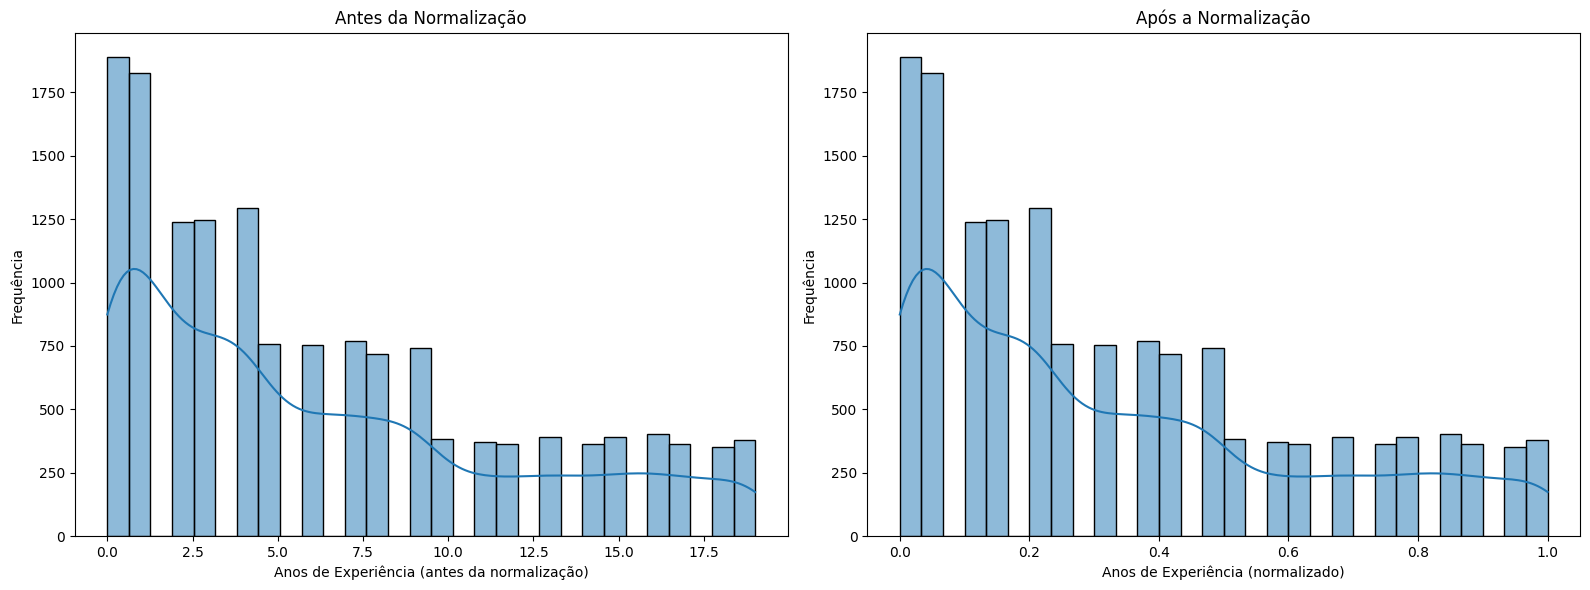

In [37]:
# Visualização lado a lado: antes e depois da normalização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 linha, 2 colunas

# Gráfico 1: Antes da normalização
sns.histplot(X['years_experience'], kde=True, ax=axes[0])
axes[0].set_title('Antes da Normalização')
axes[0].set_xlabel('Anos de Experiência (antes da normalização)')
axes[0].set_ylabel('Frequência')

# Gráfico 2: Após a normalização
sns.histplot(X_normalized_minmax['years_experience'], kde=True, ax=axes[1])
axes[1].set_title('Após a Normalização')
axes[1].set_xlabel('Anos de Experiência (normalizado)')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

## Padronização por Standar Scaler

A padronização (ou Z-score scaling) transforma os dados para ter **média 0 e desvio padrão 1**.

O objetivo é **distribuir os valores de forma equilibrada**.

Exemplo:

Um algoritmo de **machine learning** que analisa:

- **`years_experience` (anos de experiência)** (de **0 a 19**)  
- **`benefits_score`** (de **5 a 10**)

Sem padronizar, ele pode **dar mais importância para `years_experience` (anos de experiência)** apenas porque os **números são maiores**.

Com a **padronização**, **ambas as variáveis têm o mesmo peso**, e o modelo **aprende melhor**.


In [38]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [39]:
# Aprende min e max do dataset
# Aqui, o programa "aprende" qual é a média e o desvio padrão de cada coluna numérica
scaler_std.fit(X[numerical_columns])

# Agora ele aplica a transformação nos dados numéricos.
# Cada número é convertido em algo como:
# -1 (abaixo da média), 0 (igual à média), +1 (acima da média)
# Recebe os valores padronizados (com média 0 e desvio padrão 1) apenas das colunas numéricas.
# O resultado é um array NumPy, ou seja, não tem nomes de colunas nem estrutura de tabela (DataFrame).
# Esse array é “cru” — ainda não temos um DataFrame completo com todas as colunas juntas, só os números transformados.
X_normalized_numerical_values = scaler_std.transform(X[numerical_columns])

In [40]:
# Cria uma cópia do DataFrame original X para preservar os dados originais
# O novo DataFrame será usado para armazenar os valores normalizados pelo método StandardScaler
X_normalized_standard = X.copy()

# Aplica a normalização (StandardScaler) apenas nas colunas numéricas especificadas
# Substitui os valores originais pelas versões normalizadas contidas em X_normalized_numerical_values
X_normalized_standard[numerical_columns] = X_normalized_numerical_values

# Exibe as primeiras 5 linhas do DataFrame normalizado
# Permite verificar visualmente se a normalização foi aplicada corretamente
X_normalized_standard.head()

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,faixa_salarial
0,AI00001,AI Research Scientist,USD,SE,CT,China,M,China,0.012660,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,0.495313,Automotive,2024-10-18,2024-11-07,-0.741727,-1.105769,Smart Analytics,"(50000, 100000]"
1,AI00002,AI Software Engineer,USD,EN,CT,Canada,M,Ireland,1.237809,"Deep Learning, AWS, Mathematics, Python, Docker",Master,-0.947276,Media,2024-11-20,2025-01-11,-0.408456,-1.588254,TechCorp Inc,"(50000, 100000]"
2,AI00003,AI Specialist,USD,MI,FL,Switzerland,L,South Korea,-1.212489,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,-0.766953,Education,2025-03-18,2025-04-07,0.817009,1.306658,Autonomous Tech,"(150000, 200000]"
3,AI00004,NLP Engineer,USD,SE,FL,India,M,India,0.012660,"Scala, SQL, Linux, Python",PhD,0.134666,Consulting,2024-12-23,2025-02-24,-0.274801,0.755246,Future Systems,"(50000, 100000]"
4,AI00005,AI Consultant,EUR,EN,PT,France,S,Singapore,1.237809,"MLOps, Java, Tableau, Python",Master,-1.127600,Media,2025-04-15,2025-06-23,0.843046,-0.623284,Advanced Robotics,"(50000, 100000]"


In [41]:
# Exibe as últimas 5 linhas do DataFrame X_normalized_standard
# Permite verificar se a normalização foi aplicada corretamente em todo o conjunto de dados
# Útil para comparar com os primeiros registros (head) e garantir consistência
X_normalized_standard.tail()

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,faixa_salarial
14995,AI14996,Robotics Engineer,USD,EN,FL,Finland,S,Finland,0.012660,"Java, Kubernetes, Azure",Bachelor,-0.947276,Energy,2025-02-06,2025-03-25,0.228577,0.272760,Advanced Robotics,"(0, 50000]"
14996,AI14997,Machine Learning Researcher,GBP,EN,CT,United Kingdom,M,United Kingdom,-1.212489,"Mathematics, Docker, SQL, Deep Learning",Master,-1.127600,Government,2024-10-16,2024-10-30,0.209484,0.479540,Smart Analytics,"(50000, 100000]"
14997,AI14998,NLP Engineer,USD,EX,CT,South Korea,L,South Korea,0.012660,"Scala, Spark, NLP",Associate,1.937903,Manufacturing,2024-03-19,2024-05-02,-0.290423,-0.071872,AI Innovations,"(150000, 200000]"
14998,AI14999,Head of AI,EUR,EN,FT,Netherlands,M,Netherlands,-1.212489,"Java, Computer Vision, Python, TensorFlow",PhD,-0.947276,Real Estate,2024-03-22,2024-04-23,0.749313,-1.312549,Smart Analytics,"(50000, 100000]"
14999,AI15000,Computer Vision Engineer,USD,MI,PT,Austria,S,Austria,0.012660,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,-0.766953,Technology,2024-07-18,2024-08-10,1.716146,0.065981,AI Innovations,"(50000, 100000]"


### Resumo Estatístico das Variáveis Padronizadas (Média = 0, Desvio Padrão = 1)

O resumo abaixo indica que os dados passaram por um processo de padronização — ou seja, foram transformados para terem **média 0 e desvio padrão 1**.

In [42]:
X_normalized_standard.describe().round(3)

,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000,15000.000,15000.000,15000.000
mean,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-1.212,-1.128,-1.742,-1.726
25%,-1.212,-0.767,-0.867,-0.899
50%,0.013,-0.226,0.015,-0.003
75%,1.238,0.676,0.862,0.893
max,1.238,2.299,1.728,1.720


### Visualização da distribuição antes e depois da padronização (exemplo para years_experience [anos de experiência])

O histograma de **`years_experience` (anos de experiência)** após a padronização mostra que os valores foram transformados para ter **média 0 e desvio padrão 1**, centralizando a distribuição.

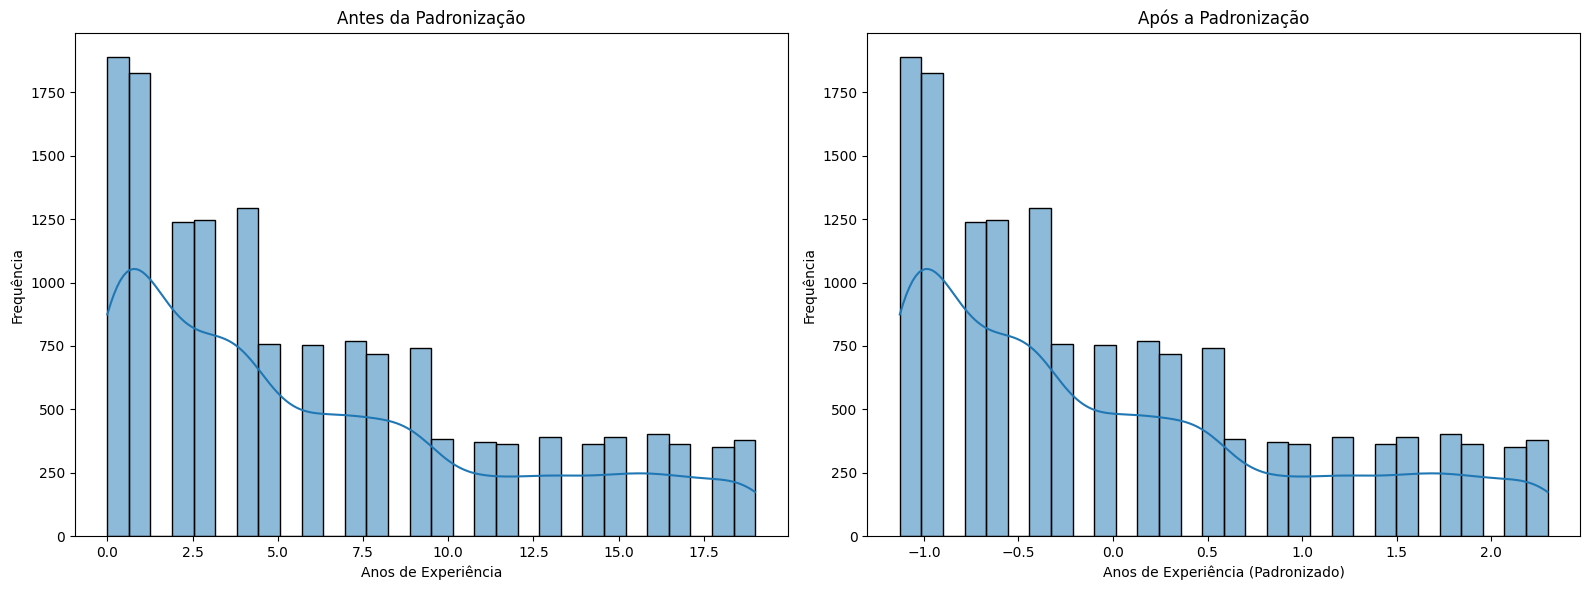

In [43]:
# Visualização lado a lado: antes e depois da padronização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 linha, 2 colunas

# Gráfico 1: Antes da padronização
sns.histplot(X['years_experience'], kde=True, ax=axes[0])
axes[0].set_title('Antes da Padronização')
axes[0].set_xlabel('Anos de Experiência')
axes[0].set_ylabel('Frequência')

# Gráfico 2: Após a padronização
sns.histplot(X_normalized_standard['years_experience'], kde=True, ax=axes[1])
axes[1].set_title('Após a Padronização')
axes[1].set_xlabel('Anos de Experiência (Padronizado)')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

## Análise de Normalidade via Q-Q Plot para Variáveis Numéricas

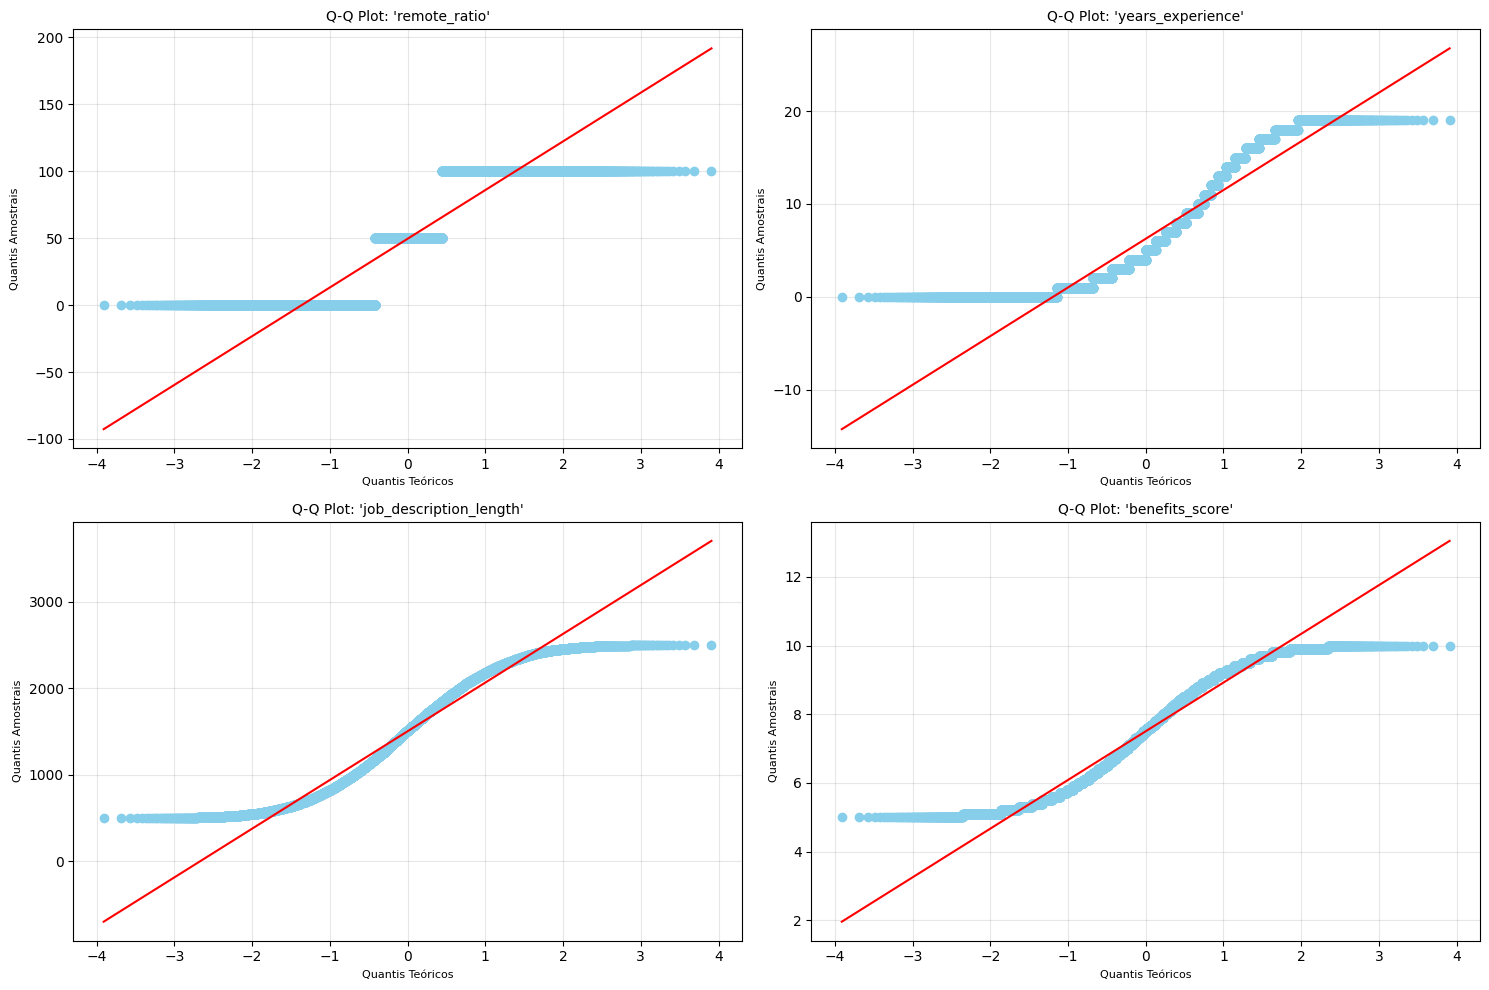

Colunas numéricas analisadas:
['remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']


In [44]:
# Configuração para exibir 2 gráficos por linha
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Caso só tenha uma linha
if n_rows == 1:
    axes = axes.reshape(1, -1)

# Itera sobre as colunas numéricas e plota cada Q-Q Plot
for idx, column in enumerate(numerical_columns):
    row = idx // n_cols
    col = idx % n_cols

    ax = axes[row, col]
    stats.probplot(X[column], dist="norm", plot=ax)

    # Altera a cor dos pontos amostrais (primeira linha retornada)
    lines = ax.get_lines()
    if len(lines) > 0:
        lines[0].set_color('skyblue')  # Esta é a linha dos dados amostrais (pontos)

    ax.set_title(f"Q-Q Plot: '{column}'", fontsize=10)
    ax.set_xlabel("Quantis Teóricos", fontsize=8)
    ax.set_ylabel("Quantis Amostrais", fontsize=8)
    ax.grid(alpha=0.3)

# Remove subplots vazios (se houver)
for idx in range(len(numerical_columns), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Exibe as colunas analisadas
print(f"Colunas numéricas analisadas:\n{numerical_columns}")

### Conclusão dos gráficos **Análise de Normalidade via Q-Q Plot para Variáveis Numéricas**

A análise dos **Q-Q Plots**, aplicada às colunas numéricas **`remote_ratio`, `years_experience`, `job_description_length` e `benefits_score`**, indica que a **maioria dessas variáveis segue uma distribuição aproximadamente normal**, o que torna o uso do **StandardScaler** apropriado para o pré-processamento dos dados, uma vez que esse método assume a **normalidade na distribuição das variáveis**.

A exceção é a variável **`remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto)**, que apresenta **desvios visíveis em relação à linha de normalidade**, sugerindo uma **distribuição discreta e não normal**. Ainda assim, como a **maior parte dos dados se aproxima de uma distribuição normal**, o **StandardScaler permanece como a escolha mais adequada** para a padronização neste contexto.

# One-hot Encoding

O **One-Hot Encoding** é uma técnica de pré-processamento utilizada para transformar variáveis categóricas, como **`job_title`**, **`salary_currency`**, **`employment_type`**, **`company_location`**, **`employee_residence`** e **`industry`**, em variáveis numéricas binárias (0 ou 1). Essa transformação é essencial para o uso em modelos de machine learning que requerem dados numéricos, como regressão, pois permite representar a **presença ou ausência** de determinada categoria sem atribuir hierarquia ou ordem entre elas. Com isso, evita-se que o modelo interprete incorretamente relações inexistentes entre categorias nominais.

Com base na tabela resultante da aplicação do One-Hot Encoding, observa-se que as colunas categóricas foram corretamente convertidas em variáveis binárias, respeitando sua natureza nominal. Por exemplo, a empresa **Smart Analytics** possui profissionais com nível de experiência **SE (Senior)** e porte **M (Médio porte)**, enquanto a **Autonomous Tech** conta com profissionais **MI (Mid-level)** em uma empresa de **grande porte (L)**. Essa codificação facilita tanto a **análise de padrões salariais** quanto a **precisão dos modelos de previsão**, assegurando uma representação fiel das informações originais sem introduzir viés estatístico.


In [45]:
#COLUNAS QUE VÃO NO ONE-HOT-ENCODING:
one_hot_columns = ["job_title", "salary_currency", "employment_type", "company_location", "employee_residence", "industry"]

In [46]:
# Cria um novo DataFrame aplicando one-hot encoding nas colunas categóricas especificadas
# O one-hot encoding transforma cada categoria em uma nova coluna binária (0 ou 1)
# Isso é útil para preparar dados categóricos para algoritmos de machine learning
encoded_df = pd.get_dummies(df, columns=one_hot_columns)

# Exibe as primeiras 5 linhas do DataFrame resultante
# Permite visualizar como as colunas categóricas foram transformadas em colunas binárias
encoded_df.head()

,job_id,salary_usd,experience_level,company_size,remote_ratio,required_skills,education_required,years_experience,posting_date,application_deadline,...,industry_Gaming,industry_Government,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation
0,AI00001,90376,SE,M,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,2024-10-18,2024-11-07,...,False,False,False,False,False,False,False,False,False,False
1,AI00002,61895,EN,M,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,2024-11-20,2025-01-11,...,False,False,False,False,True,False,False,False,False,False
2,AI00003,152626,MI,L,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,2025-03-18,2025-04-07,...,False,False,False,False,False,False,False,False,False,False
3,AI00004,80215,SE,M,50,"Scala, SQL, Linux, Python",PhD,7,2024-12-23,2025-02-24,...,False,False,False,False,False,False,False,False,False,False
4,AI00005,54624,EN,S,100,"MLOps, Java, Tableau, Python",Master,0,2025-04-15,2025-06-23,...,False,False,False,False,True,False,False,False,False,False


# Multi-label Binarizer

O **Multi-label Binarizer** é uma técnica de pré-processamento utilizada para transformar **variáveis categóricas com múltiplos valores por registro**, como a coluna **`required_skills` (habilidades exigidas)**, em **colunas binárias** (0 ou 1), que indicam a **presença ou ausência de cada habilidade em cada linha**. Diferentemente do **One-Hot Encoding** tradicional, que trata apenas uma categoria por célula, o Multi-label Binarizer é essencial para lidar com **listas de categorias**, como conjuntos de competências técnicas exigidas por vaga.

Com base na tabela resultante da aplicação do Multi-label Binarizer, observa-se que a coluna **`required_skills` (habilidades exigidas)** foi **corretamente convertida em variáveis binárias**, respeitando sua **natureza nominal**. Assim, essa representação binária permite que **modelos de machine learning compreendam a relação entre habilidades e posições ou faixas salariais**, contribuindo para análises mais precisas e relevantes.

In [47]:
mlb = MultiLabelBinarizer()

# Transforma a string em lista de habilidades (removendo espaços extras)
# A coluna required_skills tem entradas como "Python, SQL, Excel", estamos
# transformanda para ["Python", "SQL", "Excel"]

# Criando Dataframe temporário
temp = df.copy()
temp['required_skills'] = df['required_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

# Cria o Dataframe com as novas colunas após o uso do Multilabel Binarizer
required_skills_mlb = pd.DataFrame(mlb.fit_transform(temp['required_skills']), columns=mlb.classes_, index=df.index)

# Concatena as novas colunas com o dataframe antigo
required_skills_mlb_df = pd.concat([temp.drop('required_skills', axis=1), required_skills_mlb], axis=1)

required_skills_mlb_df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,1,1,0,0,0,0,0,0,1,0
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,0,0,1,0,0,0,0,0,0,0
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,1,0,0,0,0,0,0,0,0,0
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,0,0,1,0,1,1,0,0,0,0
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,0,0,1,0,0,0,0,0,1,0


In [48]:
# Exibe as últimas 5 linhas do DataFrame após o Multilabel Binarizer
# Permite verificar a transformação nas colunas categóricas no final do conjunto de dados
# Útil para confirmar que a codificação foi aplicada consistentemente em todos os registros
required_skills_mlb_df.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,...,0,0,0,0,0,0,0,0,0,0
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,0,0,0,0,1,0,0,0,0,0
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,...,1,0,0,0,0,1,1,0,0,0
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,...,0,0,1,0,0,0,0,0,0,1
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,...,0,0,0,0,0,1,0,0,0,0


# Label Encoding

O **Label Encoding** é uma técnica de pré-processamento amplamente utilizada em *Machine Learning* para converter **variáveis categóricas** em **valores numéricos inteiros**. Muitos algoritmos de aprendizado não conseguem lidar diretamente com valores textuais — como "Júnior", "Pleno" ou "Sênior" — e, por isso, é necessário transformá-los em números para que possam ser utilizados como entrada em modelos estatísticos ou matemáticos.

No caso deste dataset, as colunas **`experience_level` (nível de experiência), **`company_size` (tamanho da empresa)** e `education_required`** foram selecionadas para aplicação do **Label Encoding**. A coluna **`experience_level` (nível de experiência)**, por exemplo, foi mapeada de `'EN'` (Júnior) a `'EX'` (Executivo), assumindo valores de **0 a 3**; **`company_size` (tamanho da empresa)** foi codificada de `'S'` (Pequena) a `'L'` (Grande), assumindo valores de **0 a 2**; e **`education_required`** foi convertida de `'Associate'` a `'PhD'` (graus de formação acadêmica), assumindo valores de **0 a 3**.

A tabela gerada após a aplicação do Label Encoding mostra que essas **categorias textuais foram corretamente convertidas em inteiros distintos**, permitindo a inclusão dessas variáveis em algoritmos que exigem entradas numéricas. No entanto, é importante destacar que essa técnica **atribui uma ordem implícita aos valores**, o que pode **gerar interpretações incorretas quando aplicada a variáveis nominais**, ou seja, aquelas **sem hierarquia natural**.

In [49]:
#COLUNAS QUE VÃO NO LABEL-ENCODING:
label_columns = ["experience_level", "company_size", "education_required"]

# Valores aos quais o experience_level está sendo mapeado
dicionario_experience_level = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

# Valores aos quais o company_size está sendo mapeado
dicionario_company_size = {
    'S': 0,
    'M': 1,
    'L': 2
}

# Valores aos quais o education_required está sendo mapeado
dicionario_education_required = {
    'Associate': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

In [50]:
# Criar copia do DataFrame original para preservar os dados originais
df_label_encoded = df.copy()

# Mapeia as variáveis qualitativas para seu label correspondente
df_label_encoded['experience_level'] = df['experience_level'].map(dicionario_experience_level)
df_label_encoded['company_size'] = df['company_size'].map(dicionario_company_size)
df_label_encoded['education_required'] = df['education_required'].map(dicionario_education_required)
df_label_encoded.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,faixa_salarial
0,AI00001,AI Research Scientist,90376,USD,2,CT,China,1,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",1,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,"(50000, 100000]"
1,AI00002,AI Software Engineer,61895,USD,0,CT,Canada,1,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",2,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,"(50000, 100000]"
2,AI00003,AI Specialist,152626,USD,1,FL,Switzerland,2,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",0,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,"(150000, 200000]"
3,AI00004,NLP Engineer,80215,USD,2,FL,India,1,India,50,"Scala, SQL, Linux, Python",3,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,"(50000, 100000]"
4,AI00005,AI Consultant,54624,EUR,0,PT,France,0,Singapore,100,"MLOps, Java, Tableau, Python",2,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,"(50000, 100000]"


## Quantidade de Skills vs Salário

Nesta etapa, foi utilizada a coluna **`required_skills` (habilidades exigidas)** para criar uma **nova variável** que contabiliza o **número de habilidades técnicas exigidas** para cada vaga. Essa transformação permite analisar se existe uma **relação entre a quantidade de competências solicitadas** e a **média salarial oferecida**. O principal objetivo é verificar se **posições que demandam mais skills tendem a oferecer remunerações proporcionalmente maiores**, fornecendo assim insights relevantes sobre o impacto da complexidade técnica nas faixas salariais.

In [51]:
df["required_skills"]

,required_skills
0,"Tableau, PyTorch, Kubernetes, Linux, NLP"
1,"Deep Learning, AWS, Mathematics, Python, Docker"
2,"Kubernetes, Deep Learning, Java, Hadoop, NLP"
3,"Scala, SQL, Linux, Python"
4,"MLOps, Java, Tableau, Python"
...,...
14995,"Java, Kubernetes, Azure"
14996,"Mathematics, Docker, SQL, Deep Learning"
14997,"Scala, Spark, NLP"
14998,"Java, Computer Vision, Python, TensorFlow"


### Gráfico Salário Médio por Quantidade de Skills

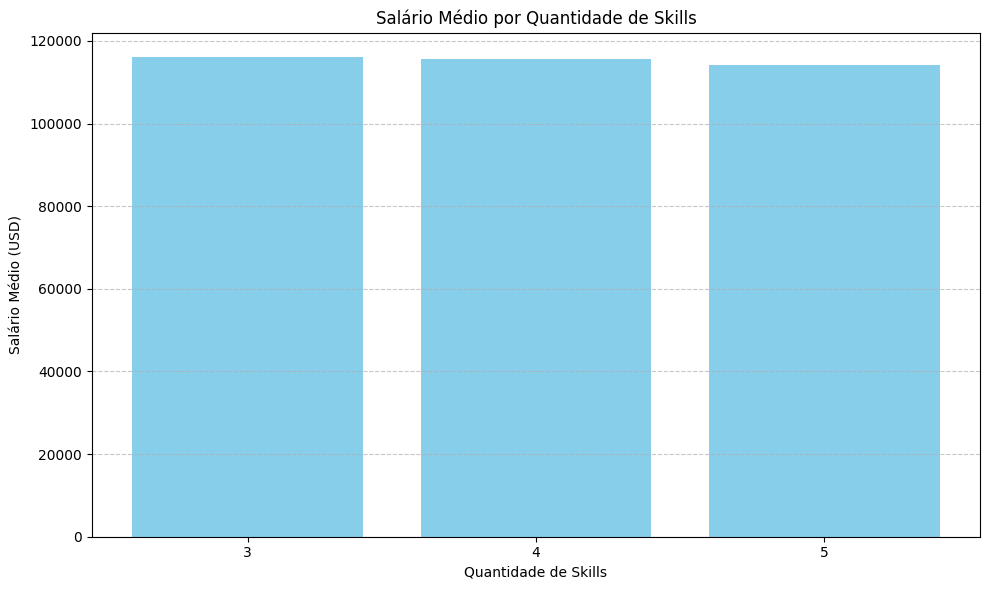

In [52]:
# Gráfico Salário Médio por Quantidade de Skills
# Cria a coluna com a quantidade de skills
df['qtd_skills'] = df['required_skills'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Agrupa pela quantidade de skills e calcula o salário médio
media_salarial_por_qtd_skills = df.groupby('qtd_skills')['salary_usd'].mean().reset_index()

# Criação do gráfico de barras com cor skyblue
plt.figure(figsize=(10, 6))
plt.bar(media_salarial_por_qtd_skills['qtd_skills'],
        media_salarial_por_qtd_skills['salary_usd'],
        color='skyblue')

# Títulos e rótulos
plt.xlabel('Quantidade de Skills')
plt.ylabel('Salário Médio (USD)')
plt.title('Salário Médio por Quantidade de Skills')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(media_salarial_por_qtd_skills['qtd_skills'])  # mostra todos os ticks do eixo X

# Exibição do gráfico
plt.tight_layout()
plt.show()

#### Conclusão do gráfico **Salário Médio por Quantidade de Skills**

Com base no gráfico **"Salário Médio por Quantidade de Skills"**, construído a partir das colunas **`required_skills` (habilidades exigidas)**, **`qtd_skills` (quantidade de habilidades extraída de `required_skills`)** e **`salary_usd` (salário em dólares)**, pode-se concluir que a **média salarial não apresenta variações significativas conforme a quantidade de skills exigidas**.

Mesmo com o aumento de **3 para 5 habilidades técnicas requisitadas**, o **salário médio se mantém praticamente estável**, variando em torno de **USD 115.000**. Esse comportamento indica que, para este conjunto de dados, a **exigência de mais competências técnicas não está diretamente associada a um aumento proporcional na remuneração**.

## Funções da pipeline

In [53]:
# Tratamento de Valores Nulos
def remove_nan_values(X_train, X_test, y_train, y_test):
    X_train = X_train.dropna()
    X_test = X_test.dropna()
    y_train = y_train[X_train.index]
    y_test = y_test[X_test.index]
    return X_train, X_test, y_train, y_test

In [54]:
# Label Encoding
def get_label_encoder(X_train, X_test):
    dicionario_experience_level = {
        'EN': 0,
        'MI': 1,
        'SE': 2,
        'EX': 3
    }
    dicionario_company_size = {
        'S': 0,
        'M': 1,
        'L': 2
    }
    dicionario_education_required = {
        'Associate': 0,
        'Bachelor': 1,
        'Master': 2,
        'PhD': 3
    }
    X_train_label_encoded = X_train.copy()
    X_test_label_encoded = X_test.copy()
    X_train_label_encoded['experience_level'] = X_train['experience_level'].map(dicionario_experience_level)
    X_train_label_encoded['company_size'] = X_train['company_size'].map(dicionario_company_size)
    X_train_label_encoded['education_required'] = X_train['education_required'].map(dicionario_education_required)
    X_test_label_encoded['experience_level'] = X_test['experience_level'].map(dicionario_experience_level)
    X_test_label_encoded['company_size'] = X_test['company_size'].map(dicionario_company_size)
    X_test_label_encoded['education_required'] = X_test['education_required'].map(dicionario_education_required)
    return X_train_label_encoded, X_test_label_encoded

In [55]:
# Normalização (StandardScaler)
def get_standard_scaler(X_train, X_test):
	numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
	print(numerical_columns)
	var_standardscaler = StandardScaler()
	var_standardscaler.fit(X_train[numerical_columns])
	X_train_scaled = X_train.copy()
	X_test_scaled = X_test.copy()
	X_train_scaled[numerical_columns] = var_standardscaler.transform(X_train[numerical_columns])
	X_test_scaled[numerical_columns] = var_standardscaler.transform(X_test[numerical_columns])
	return X_train_scaled, X_test_scaled

In [56]:
# One-hot Encoding
def get_one_hot_encoding(X_train, X_test):
    one_hot_columns = ["job_title", "salary_currency", "employment_type", "company_location", "employee_residence", "industry"]
    X_train_dummies = pd.get_dummies(X_train, columns=one_hot_columns)
    X_test_dummies = pd.get_dummies(X_test, columns=one_hot_columns)
    return X_train_dummies, X_test_dummies

In [57]:
# Multi-label Binarizer
def get_multi_label_binarizer(X_train, X_test):
    mlb = MultiLabelBinarizer()
    temp = X_train.copy()
    temp['required_skills'] = X_train['required_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])
    required_skills_mlb = pd.DataFrame(mlb.fit_transform(temp['required_skills']), columns=mlb.classes_, index=X_train.index)
    required_skills_mlb_X_train = pd.concat([temp.drop('required_skills', axis=1), required_skills_mlb], axis=1)
    temp = X_test.copy()
    temp['required_skills'] = X_test['required_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])
    required_skills_mlb = pd.DataFrame(mlb.transform(temp['required_skills']), columns=mlb.classes_, index=X_test.index)
    required_skills_mlb_X_test = pd.concat([temp.drop('required_skills', axis=1), required_skills_mlb], axis=1)
    return required_skills_mlb_X_train, required_skills_mlb_X_test

## Pipeline

In [58]:
# Pré-Processamento de Dados - Pipeline completo
def pipeline(X_train, X_test, y_train, y_test):
    X_train_nan, X_test_nan, y_train_nan, y_test_nan = remove_nan_values(X_train, X_test, y_train, y_test)
    X_train_label_encoded, X_test_label_encoded = get_label_encoder(X_train_nan, X_test_nan)
    X_train_scaled, X_test_scaled = get_standard_scaler(X_train_label_encoded, X_test_label_encoded)
    X_train_dummies, X_test_dummies = get_one_hot_encoding(X_train_scaled, X_test_scaled)
    required_skills_mlb_X_train, required_skills_mlb_X_test = get_multi_label_binarizer(X_train_dummies, X_test_dummies)

    X_train_final, X_test_final, y_train_final, y_test_final = required_skills_mlb_X_train, required_skills_mlb_X_test, y_train_nan, y_test_nan
    return X_train_final, X_test_final, y_train_final, y_test_final

In [59]:
# Dividir os dados em conjuntos de treino e teste
# test_size=0.3 significa que 30% dos dados foram reservados para teste e 70% para treino
# random_state=42 serve para garantir que essa divisão seja sempre igual toda vez que rodar o código (útil para reprodução)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train, X_test, y_train, y_test = pipeline(X_train, X_test, y_train, y_test)

['remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']


In [61]:
X_train.describe()

,experience_level,company_size,remote_ratio,education_required,years_experience,job_description_length,benefits_score,AWS,Azure,Computer Vision,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
count,10500.000000,10500.000000,1.050000e+04,10500.000000,1.050000e+04,1.050000e+04,1.050000e+04,10500.000000,10500.000000,10500.000000,...,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,1.496476,0.995048,3.045183e-17,1.491905,-2.876006e-17,-1.847411e-16,-4.973799e-16,0.133429,0.141429,0.150571,...,0.142476,0.188190,0.299238,0.156476,0.226286,0.191619,0.141524,0.125238,0.157238,0.202476
std,1.114840,0.816637,1.000048e+00,1.118058,1.000048e+00,1.000048e+00,1.000048e+00,0.340054,0.348480,0.357648,...,0.349555,0.390883,0.457946,0.363323,0.418446,0.393594,0.348578,0.331004,0.364042,0.401864
min,0.000000,0.000000,-1.200454e+00,0.000000,-1.125598e+00,-1.744528e+00,-1.730100e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,-1.200454e+00,0.000000,-7.619939e-01,-8.652297e-01,-8.307253e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.592925e-02,1.000000,-3.983894e-01,1.406894e-02,-5.336946e-04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.252313e+00,2.000000,5.106220e-01,8.568750e-01,8.988405e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,2.000000,1.252313e+00,3.000000,2.328645e+00,1.729223e+00,1.729032e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
print(f"Dimensões de X_train: {X_train.shape}") # X_train: dados de entrada para treinar o modelo
print(f"Dimensões de X_test: {X_test.shape}") # X_test: dados de entrada para testar o modelo
print(f"Dimensões de y_train: {y_train.shape}") # y_train: salários para treinar (as respostas corretas)
print(f"Dimensões de y_test: {y_test.shape}") # y_test: salários para testar (para conferir se o modelo aprendeu direito)

Dimensões de X_train: (10500, 118)
Dimensões de X_test: (4500, 118)
Dimensões de y_train: (10500,)
Dimensões de y_test: (4500,)


In [63]:
X_train.head()

,job_id,experience_level,company_size,remote_ratio,education_required,years_experience,posting_date,application_deadline,job_description_length,benefits_score,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
11797,AI11798,1,0,0.025929,3,-0.398389,2025-01-05,2025-03-14,1.008059,0.137832,...,1,0,0,1,0,0,0,0,0,1
5899,AI05900,0,1,-1.200454,2,-0.943796,2024-08-19,2024-10-02,1.678828,1.729032,...,0,0,1,0,0,0,1,0,1,0
9513,AI09514,0,1,-1.200454,0,-0.943796,2024-04-11,2024-05-01,1.378198,0.207014,...,0,0,0,0,0,1,0,0,1,0
1572,AI01573,0,2,1.252313,3,-0.943796,2024-06-22,2024-07-16,0.672674,0.345379,...,0,0,0,1,1,0,0,1,0,0
12995,AI12996,0,2,0.025929,2,-0.943796,2025-03-10,2025-05-22,-0.185772,-0.623177,...,0,1,0,0,1,1,0,0,0,0


In [64]:
X_train.tail()

,job_id,experience_level,company_size,remote_ratio,education_required,years_experience,posting_date,application_deadline,job_description_length,benefits_score,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
5191,AI05192,1,0,0.025929,0,-0.398389,2024-02-13,2024-02-29,-0.542009,-0.899908,...,0,0,1,0,1,0,0,0,0,0
13418,AI13419,2,2,-1.200454,2,-0.216587,2025-03-02,2025-05-11,0.999370,-1.453369,...,0,1,1,0,0,0,0,0,1,1
5390,AI05391,0,2,-1.200454,3,-0.943796,2024-05-29,2024-07-05,0.566672,0.691293,...,0,0,0,0,1,0,0,0,0,0
860,AI00861,2,0,0.025929,2,0.328820,2025-01-28,2025-03-06,0.312961,-0.069716,...,1,0,0,0,0,0,1,0,0,0
7270,AI07271,0,2,-1.200454,1,-0.943796,2024-04-01,2024-04-23,0.036660,-1.384186,...,0,1,0,1,0,0,0,0,0,0


In [65]:
X_test.head()

,job_id,experience_level,company_size,remote_ratio,education_required,years_experience,posting_date,application_deadline,job_description_length,benefits_score,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
11499,AI11500,2,0,1.252313,0,0.510622,2024-04-22,2024-07-04,0.862088,-0.277264,...,0,0,0,0,1,0,0,0,0,0
6475,AI06476,2,0,0.025929,2,0.510622,2024-05-09,2024-06-23,1.393838,-1.384186,...,0,0,1,0,0,0,0,1,1,0
13167,AI13168,2,1,1.252313,1,0.510622,2024-04-24,2024-06-10,-1.569016,-1.176638,...,0,0,1,0,0,0,0,1,0,1
862,AI00863,2,1,-1.200454,1,0.147017,2025-04-21,2025-05-10,-1.355274,0.691293,...,1,0,1,0,0,0,0,0,0,0
5970,AI05971,0,1,-1.200454,3,-0.943796,2024-09-27,2024-11-06,0.884679,1.659849,...,0,0,0,0,1,0,0,0,0,0


In [66]:
X_test.tail()

,job_id,experience_level,company_size,remote_ratio,education_required,years_experience,posting_date,application_deadline,job_description_length,benefits_score,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
4217,AI04218,2,2,0.025929,0,0.510622,2025-04-20,2025-06-15,0.988944,-1.660917,...,0,0,1,0,0,0,0,0,0,1
13886,AI13887,0,1,-1.200454,3,-1.125598,2025-03-03,2025-04-15,-0.667127,-1.453369,...,0,0,1,0,0,0,0,0,0,0
10464,AI10465,0,0,1.252313,0,-0.943796,2024-08-31,2024-10-27,-0.952117,1.313936,...,0,0,1,0,0,0,0,0,0,1
6902,AI06903,1,0,0.025929,1,-0.580192,2025-01-11,2025-02-11,-1.073759,-0.069716,...,0,1,0,0,0,0,0,1,1,0
4874,AI04875,1,1,-1.200454,3,-0.761994,2024-12-27,2025-03-10,1.143603,-0.553995,...,1,1,0,0,0,0,0,0,0,1


## Resumo do Pré-Processamento

### Importância da Criação da Pipeline

A criação de uma **pipeline** no projeto teve como objetivo **estruturar o pré-processamento dos dados de forma modular e organizada**. Ao definir uma **função central que conduz cada etapa** — desde a limpeza até a transformação dos dados —, foi possível promover a **modularização**, facilitando a **leitura, manutenção e reaproveitamento do código** em diferentes contextos. Essa abordagem também **automatiza processos repetitivos** e garante que todas as etapas do *machine learning* sejam executadas de forma **sistemática e reproduzível**, o que é essencial em projetos profissionais e acadêmicos.

Além disso, as funções foram criadas de forma a **evitar problemas críticos como o *data leakage*** (vazamento de dados), que ocorre quando **informações do conjunto de teste ou validação influenciam o treinamento** do modelo. Esse tipo de falha comprometeria a confiabilidade dos resultados, pois o modelo passaria a aprender com dados que, na prática, **não estariam disponíveis no momento da previsão**. Usando apenas os dados de treino para as configurações do pré-processamento e apenas depois aplicando o mesmo nos dados de teste, é possível garantir que os dados **fluam corretamente**, protegendo o modelo de contaminações e assegurando avaliações mais **realistas e seguras**.

Os dados foram preparados para **ensinar uma máquina a prever salários** com base em outras informações.

- Primeiro, os dados foram **separados** em:
  - **Entradas (X)**: todas as colunas, exceto a de salário.
  - **Saída (y)**: apenas a coluna de **`salary_usd` (salário em dólares)**, que representa o valor a ser previsto.

- Em seguida, os dados foram **divididos** em dois grupos:
  - **Treino** (70% dos dados): usados para ensinar o modelo.
  - **Teste** (30% dos dados): usados para verificar se o modelo aprendeu corretamente.

- Por fim, pode-se dizer que no pipeline foram usadas as funções: remove_nan_values(), get_label_encoder(), get_standard_scaler(), get_one_hot_encoding(), get_multi_label_binarizer()

# Conclusão

A análise e o pré-processamento do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) evidenciaram a importância de **preparar corretamente os dados antes da modelagem**.

Nesse momento, com os dados devidamente pré-processados, o pipeline está pronto para receber novos conjuntos de dados e alimentar um modelo de IA para realizar seu treinamento. Sendo a estrutura modular e padronizada que garante que os modelos tenham informações consistentes e tratadas, maximizando seu desempenho, bastando inserir novos dados no fluxo e todo o processo funcionará de forma automatizada, reprodutível e escalável, possibilitando análises robustas e decisões mais embasadas no contexto do mercado global de IA.

# Hipóteses

As hipóteses levantadas no início do MVP de Análise de Dados e Boas Práticas, usando o dataset: [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) foram:

1. A localização geográfica da companhia seria um fator que influencia no salário do profissional de IA?

    **Resposta 1:** A hipótese 1 foi confirmada. Sim, a localização geográfica da companhia é um fator que influencia no salário do profissional, pois como mostra o gráfico de barras **Salário Médio por País, existe diferença entre as médias salariais (normalizadas para USD) por localização geográfica da companhia (de 20 países)**, sendo a maior média salarial na Suíça e a menor na Índia.
2. Existe diferença no salário entre profissionais de IA que trabalham de maneira remota, híbrida ou presencial?

    **Resposta 2:** A hipótese 2 foi negada. Não, não existe diferença no salário entre profissionais que trabalham de maneira remota, híbrida ou presencial, pois como mostra o gráfico **Salário Médio por modelo de trabalho (presencial, híbrido ou remoto), não há uma diferença significativa entre as médias salariais (normalizadas para USD) por modelo de trabalho**.
3. Há similaridades de skills entre os profissionais de IA mais bem remunerados?

    **Resposta 3:** A hipótese 3 foi confirmada. Sim, há similaridades de skills entre os profissionais de IA mais bem remunerados, pois como mostra o gráfico **Top 10 Skills mais frequentes no quartil superior de salários**, as top 10 skills são: Python, SQL, TensorFlow, Kubernetes, Scala, PyTorch, Git, Linux, Java, GCP. Por fim, pode-se afirmar que entre as skills anteriormente citadas, **as principais são: Python, SQL e TensorFlow**.
4. Existe alguma correlação entre o tamanho da empresa e o salário do profissional de IA?

    **Resposta 4:** A hipótese 4 foi confirmada. Sim, existe correlação entre o tamanho da empresa e o salário do profissional de IA, pois como mostra o histograma de **Distribuição de Salários por Tamanho de Empresa, as empresas de grande porte tendem a se sobressaírem com a maior quantidade de casos de altos salários**.
5. Os profissionais de diferentes ramificações da IA têm remunerações diferentes?
    
    **Resposta 5:** A hipótese 5 foi negada. Não, os profissionais de diferentes ramificações da IA não têm remunerações diferentes, pois como mostra o gráfico **Boxplot de Distribuição de Salários por Job Title (Área de Atuação)** e das tabelas com dados de **Distribuição de Salários por Job Title (Área de Atuação), é possível perceber uma distribuição salarial relativamente homogênea entre os cargos analisados, sem evidências de distorções severas**.
6. O setor da empresa altera o salário do profissional de IA?

    **Resposta 6:** A hipótese 6 foi negada. Não, o setor da empresa não altera o salário do profissional de IA, pois como mostra o gráfico **Boxplot de Distribuição de Salários por Setor** e das tabelas com dados de **Distribuição de Salários por Setor, a distribuição salarial entre as setores analisadas não apresenta distorções graves, indicando uma estrutura salarial relativamente equilibrada**

7. O nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência influenciam o salário?

    **Resposta 7:** A hipótese 7 foi confirmada. Sim, o nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência sim influenciam o salário, pios como mostra o gráfico **Boxplot de Distribuição de Salários por Nível de Experiência** e das tabelas com dados de **Distribuição de Salários por Nível de Experiência**, além do gráfico **Salário Médio** e **Anos de Experiência por Nível**, os dados apontam para uma **estrutura salarial escalonada conforme o avanço na experiência**, com **incremento esperado de variabilidade e remuneração**.